# **FACTORES QUE INFLUYEN EN EL PESO DE LAS PERSONAS.**



![logo](https://img.freepik.com/vector-premium/mezcle-personas-raza-diferente-altura-tipo-figura-tamano-pie-juntos-aman-su-concepto-cuerpo_48369-43940.jpg?w=1380)

---
## **Índice:**

1. Abstract con motivación y audiencia.
2. Contexto y objetivos.
3. Información a utilizar (dataset).
4. Importación de librerias y carga de Dataset.
5. Análisis general de los datos.
6. Agregamos el campo IMC (Índice Masa Corporal).
7. ¿Cómo se dividen los datos respecto al género?
8. Análisis de las variables categóricas.
9. Análisis de las variables numéricas.
10. ¿Cómo se relaciona el peso con la altura?
11. ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?
12. ¿Influyen los antecedentes familiares en el sobrepeso?
13. ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?
14. Análisis de la relación entre el medio de transporte más utilizado y el peso, diferenciando si consumen tabaco o no.
15. Análisis de la relación entre cat_IMC, el género y el tipo de transporte utilizado.
16. Normalización.
17. ¿Existe relación entre el IMC y los campos, sin importar el peso y la altura?
18. Explicación de las métricas para los Modelos de Clasificación.
19. ¿Cómo es la clasificación respecto a la categorización sobre el IMC?
20. ¿Cómo es la clasificación respecto a la categorización inicial de NObeyesdad?
21. ¿Conviene otra cantidad de agrupamientos?
22. Validación de los modelos.
23. ¿Cuáles son los factores que mayor y menor relevancia tienen sobre NObeyesdad?
24. Conclusión.


---

## **1 - Abstract con motivación y audiencia:**

El estudio en cuestión busca analizar distintos hábitos y costumbres cotidianas de las personas, y poder identificar los factores que mayor relevancia tienen en su peso.

Esto es importante para poder gestionar distintas políticas en diversas áreas buscando prevenir enfermedades, e incentivando una mayor conciencia personal y familiar, buscando generar una mejor calidad de vida.

Existen distintas entidades que se deben involucrar en esta problemática y gestionar acciones al respecto desde distintos ángulos:
*   Organismos de salud.
*   Organismos educativos de distintos niveles, tanto públicos como privados.
*   Empresas.

## **2 - Contexto y objetivos:**

**Contexto Comercial:**

Se busca poder conocer mejor la problemática del sobrepeso, identificar y diferenciar las dos grandes segmentaciones de sobrepeso y obesidad, y poder generar mejores políticas y campañas de prevención para poder reducirla.

**Definición de Objetivo:**

Predecir los factores que más favorecen el sobrepeso de las personas en relación a la alimentación, actividad física, entre otras.

**Contexto Analítico:**

Utilizando la información del dataset en conjunto con técnicas de análisis de datos y distintos modelos, se buscará dar respuestas a las preguntas e hipótesis planteadas posteriormente.

## **3 - Información a utilizar (dataset):**

Para poder desarrollar el estudio en cuestión se utiliza información obtenida de una [encuesta web anónima](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) a habitantes de México, Perú y Colombia, dentro de una franja etaria de entre 14 y 61 años.

De dicha encuesta se recopila información de **2111 personas** sobre los siguientes **17 campos**:
*   Gender: Género.
*   Age: Edad.
*   Height: Altura.
*   Weight: Peso.
*   Family_history_with_overweight: Historial familiar con sobrepeso.
*   FAVC: Frecuencia de consumo de alimentos altos en calorías por semana.
*   FCVC: Frecuencia de consumo de vegetales por semana.
*   NCP: Número de comidas principales por día.
*   CAEC: Consumo de alimentos entre comidas.
*   SMOKE: Consumo de tabaco.
*   CH2O: Consumo de agua diario.
*   SCC: Control del consumo de calorías.
*   FAF: Frecuencia de actividad física por semana.
*   TUE: Tiempo de uso de dispositivos tecnológicos por semana.
*   CALC: Consumo de alcohol.
*   MTRANS: Transporte utilizado.
*   NObeyesdad: Nivel de obesidad.




Se decide agregar el campo IMC (Índice de Masa Corporal), el cual relaciona el peso con la altura:

$$IMC = \frac{peso}{altura*altura}$$

Y posee las siguientes clasificaciones:

Clasificación | Rangos
:---: | :---:
Insuficiente | menor a 18.5
Normal | entre 18.5 y 24.9
Sobrepeso_I | entre 25.0 y 26.9
Sobrepeso_II | entre 27.0 y 29.9
Obesidad_I | entre 30.0 y 34.9
Obesidad_II | entre 35.0 y 39.9
Obesidad_III | mayor a 40.0

La idea de agregar este campo es poder comprobar si hay diferencia entre la clasificación original del dataset ("NObeyesdad"), y la clasificación conocida popularmente mediante dicha fórmula.

## **4 - Importación de librerias y carga de Dataset:**

### Instalamos librerias:

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.4 MB/s eta 0:00:00


In [2]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.4 MB/s eta 0:00:00


### Cargamos librerias:

In [3]:
# Carga de datos:
from google.colab import drive

# Tratamiento de datos:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
import random

# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Visualizacipon de nulos:
import missingno as msno

# Detección de outliers:
from sklearn.ensemble import IsolationForest

# Estadística:
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import pointbiserialr, spearmanr, pearsonr, contingency

# Preprocesado y modelado:
from sklearn.model_selection import train_test_split

# Modelos de regresión:
from sklearn.linear_model import LinearRegression

# Modelos de clasificación:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Selección de Modelos:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from scipy.stats import randint

# Modelos de clustering:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Feature Engineering:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import permutation_importance

# Validación:
from sklearn.model_selection import LeaveOneOut, KFold, StratifiedKFold, cross_val_score

# Reducción de dimensionalidad:
from sklearn.decomposition import PCA

# Métricas:
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
# Montamos Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Especificamos la ruta al archivo
ruta_csv = '/content/drive/MyDrive/Coderhouse - Data Science/Entregas/2 entrega/ObesityDataSet.csv'

# Leemos el archivos con un DataFrame de pandas
df = pd.read_csv(ruta_csv, sep = ',')

In [6]:
# Configuramos el estilo de gráficos con el que vamos a trabajar
plt.style.use('bmh')

## **5 - Análisis general de los datos:**

In [7]:
# Mostramos el DataFrame
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [8]:
# Mostramos la información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
# Cambiamos el tipo de dato del campo 'Age' de flotante a entero
df['Age'] = df['Age'].astype(int)

In [10]:
# Cambiamos la cantidad de decimales de los campos 'Height' y 'Weight'
df['Height'] = df['Height'].round(2)
df['Weight'] = df['Weight'].round(2)

### Verificación de datos nulos y duplicados:

In [11]:
# Verificamos la presencia de valores nulos
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<Axes: >

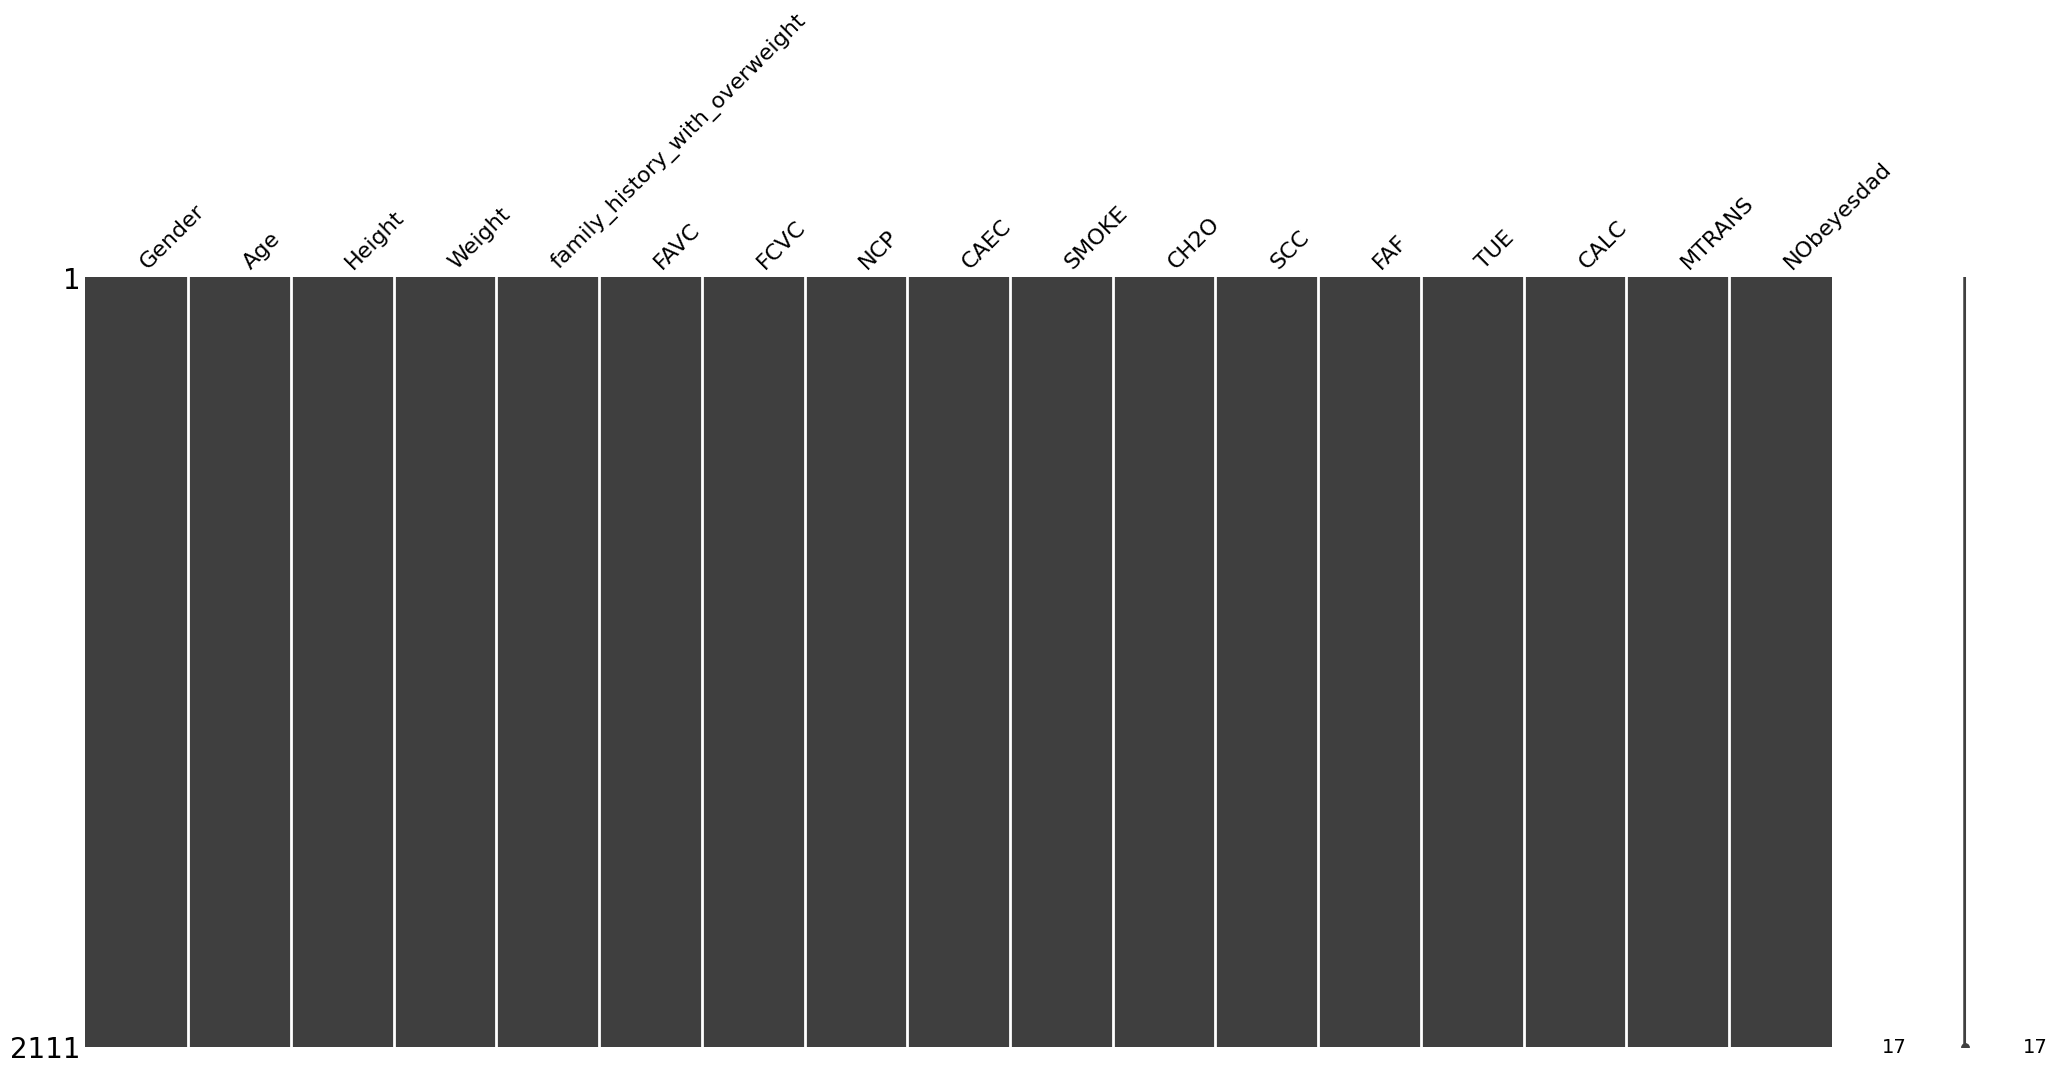

In [12]:
# Visualización tipo matriz: Identifica el patrón de ausencia de datos
msno.matrix(df)

<Axes: >

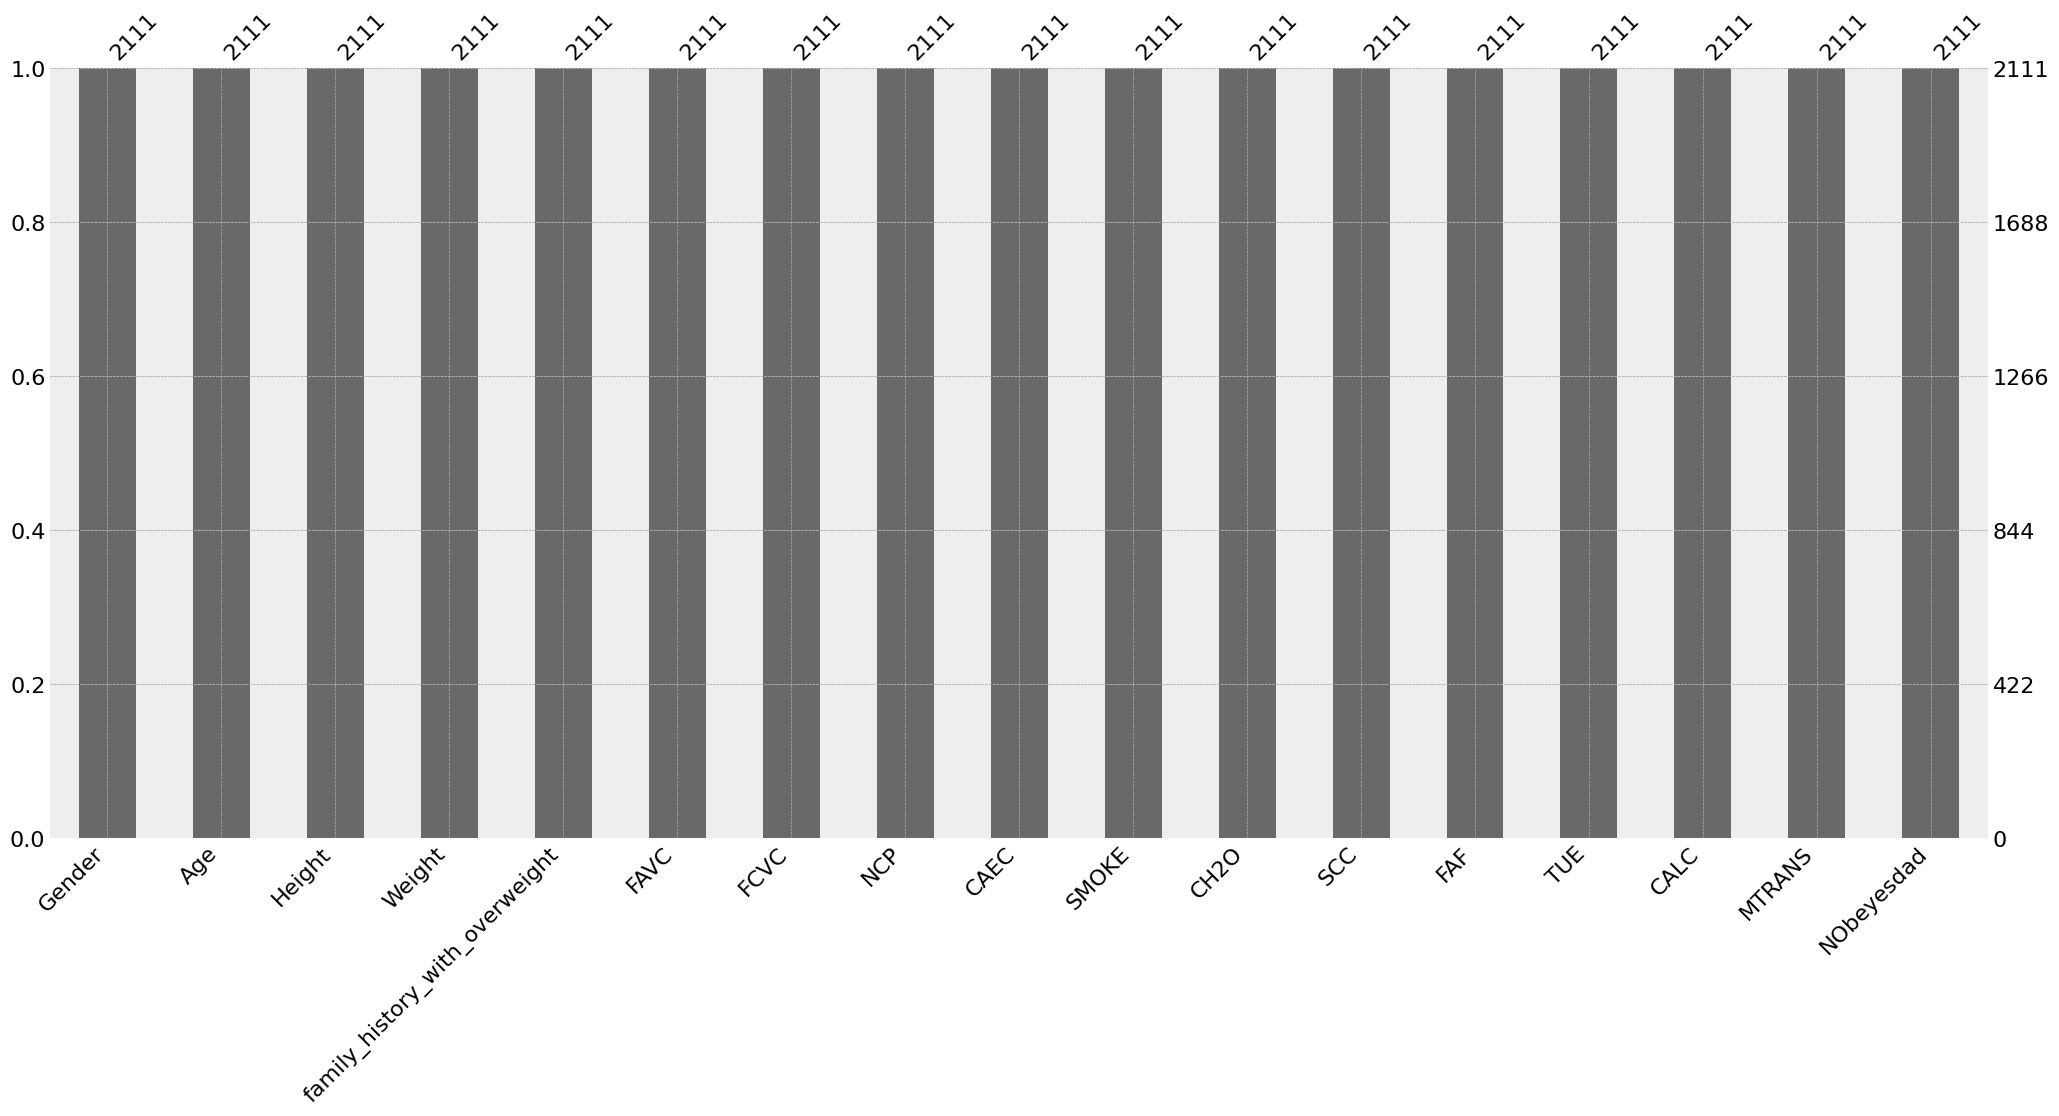

In [13]:
# Visualización con barras: Visualiza la completitud del conjunto de datos
msno.bar(df)

In [14]:
# Verificamos la existencia de duplicados
print(f"La presencia de datos duplicados es: {df.duplicated().any()}")
df.duplicated().value_counts()

La presencia de datos duplicados es: True


False    2087
True       24
Name: count, dtype: int64

Podemos notar que no existen datos nulos, pero que si hay filas repetidas, a las cuales se decide no quitarlas dado que como se indicó al inicio, el relevamiento original fue sobre 2111 personas de distintos países, por lo que no se descarta que una cierta cantidad mínima de datos se puedan repetir, siendo para este caso menor al 1,5%.

### Verificación de valores outliers:

#### Método IQR

In [15]:
# Creamos una función para analizar los valores outliers
def detectar_outliers_iqr(df, columnas):
    resultado_outliers = pd.DataFrame(index=df.index)

    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        es_outlier = (df[columna] < limite_inferior) | (df[columna] > limite_superior)

        resultado_outliers[columna] = es_outlier

    return resultado_outliers

In [16]:
# Hacemos uso de la función anterior
var_num_ini = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outliers_iqr = detectar_outliers_iqr(df, var_num_ini)

print(outliers_iqr)

        Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
0     False   False   False  False  False  False  False  False
1     False   False   False  False  False  False  False  False
2     False   False   False  False  False  False  False  False
3     False   False   False  False  False  False  False  False
4     False   False   False  False   True  False  False  False
...     ...     ...     ...    ...    ...    ...    ...    ...
2106  False   False   False  False  False  False  False  False
2107  False   False   False  False  False  False  False  False
2108  False   False   False  False  False  False  False  False
2109  False   False   False  False  False  False  False  False
2110  False   False   False  False  False  False  False  False

[2111 rows x 8 columns]


#### Método Z-score

In [17]:
def detectar_outliers_zscore(df, columnas, umbral=3):
    resultado_outliers = pd.DataFrame(index=df.index, columns=columnas)

    for columna in columnas:
        media = df[columna].mean()
        desviacion_std = df[columna].std()

        # Calcula el Z-score absoluto
        z_score = ((df[columna] - media) / desviacion_std).abs()

        # Marca como True los outliers y False los demás
        resultado_outliers[columna] = z_score > umbral

    return resultado_outliers

In [18]:
# Aplicar la función a las columnas de interés
outliers_zscore = detectar_outliers_zscore(df, var_num_ini)

print(outliers_zscore)

        Age  Height  Weight   FCVC    NCP   CH2O    FAF    TUE
0     False   False   False  False  False  False  False  False
1     False   False   False  False  False  False  False  False
2     False   False   False  False  False  False  False  False
3     False   False   False  False  False  False  False  False
4     False   False   False  False  False  False  False  False
...     ...     ...     ...    ...    ...    ...    ...    ...
2106  False   False   False  False  False  False  False  False
2107  False   False   False  False  False  False  False  False
2108  False   False   False  False  False  False  False  False
2109  False   False   False  False  False  False  False  False
2110  False   False   False  False  False  False  False  False

[2111 rows x 8 columns]


#### Método Isolation Forest

In [19]:
# Suponiendo que 'columnas_a_analizar' contiene las columnas de interés en tu DataFrame 'df'
clf = IsolationForest(random_state=73)
df['outlier_isolation'] = clf.fit_predict(df[var_num_ini])

# Convertir las etiquetas de -1 (outlier) y 1 (no outlier) a 0 y 1, respectivamente
df['outlier_isolation'] = df['outlier_isolation'].map({-1: 1, 1: 0})

df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  outlier_isolation  
0        Normal_Weight                  0  
1        Normal_Weight                  1  
2        Normal_Weight                  0  
3   Overweight_Level_I                  0  
4  Overweight_Level_II                  0

#### Análisis de los distintos métodos

In [20]:
# Definir una regla heurística donde un registro se considera un outlier si al menos el 80% de las columnas lo indican
porcentaje_para_outlier = 0.8

# Calcular el porcentaje de columnas que consideran cada registro como outlier para Z-score y IQR
porcentaje_outliers_zscore = outliers_zscore.mean(axis=1)
porcentaje_outliers_iqr = outliers_iqr.mean(axis=1)

# Aplicar la regla heurística para marcar registros como outliers en el DataFrame original
df['outlier_zscore'] = porcentaje_outliers_zscore >= porcentaje_para_outlier
df['outlier_iqr'] = porcentaje_outliers_iqr >= porcentaje_para_outlier

# Convertir los booleanos a valores numéricos para consistencia con 'outliers_isolation'
df['outlier_zscore'] = df['outlier_zscore'].astype(int) * 1  # 1 para outliers, 0 para no outliers
df['outlier_iqr'] = df['outlier_iqr'].astype(int) * 1  # 1 para outliers, 0 para no outliers

df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  outlier_isolation  outlier_zscore  outlier_iqr  
0        Normal_Weight                  0               0            0  
1        Normal_Weight                  1               0            0  
2        Normal_Weight                  0               0            0  
3   Overweight_Level_I                  0               0            0  
4  Overweight_Level_II                  0               0            0

In [21]:
# Analizamos la cantidad de valores que se consideran outliers
df.outlier_isolation.value_counts()

outlier_isolation
0    1366
1     745
Name: count, dtype: int64

In [22]:
# Analizamos la cantidad de valores que se consideran outliers
df.outlier_zscore.value_counts()

outlier_zscore
0    2111
Name: count, dtype: int64

In [23]:
# Analizamos la cantidad de valores que se consideran outliers
df.outlier_iqr.value_counts()

outlier_iqr
0    2111
Name: count, dtype: int64

En base a la regla heurística adoptada, y al posterior conteo de los valores, se puede notar que el único método que detecta valores outliers es Isolation Forest, por lo que se decide no eliminarlos.

In [24]:
# Eliminamos los campos agregados en el estudio de los valores outliers
df = df.drop('outlier_isolation', axis=1)
df = df.drop('outlier_zscore', axis=1)
df = df.drop('outlier_iqr', axis=1)

## **6 - Agregamos el campo IMC (Índice Masa Corporal):**

In [25]:
# Agregamos la columna IMC
df['IMC'] = (df['Weight'] / (df['Height'] * df['Height']))

# Redondeamos la cantidad de decimales
df['IMC'] = df['IMC'].round(1)

In [26]:
# creamos una función para categorizar IMC
def categorias_imc(IMC):
    if IMC < 18.5:
        return 'insuficiente'
    elif 18.5 <= IMC < 25:
        return 'normal'
    elif 25 <= IMC < 27:
        return 'sobrepeso_I'
    elif 27 <= IMC < 30:
        return 'sobrepeso_II'
    elif 30 <= IMC < 35:
        return 'obesidad_I'
    elif 35 <= IMC < 40:
        return 'obesidad_II'
    else:
        return 'obesidad_III'

# Agregamos una nueva columna con la categorización
df['cat_IMC'] = df['IMC'].apply(categorias_imc)

In [27]:
# Verifico los valores únicos de NObeyesdad
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [28]:
# Verifico los valores únicos de cat_IMC
df['cat_IMC'].value_counts()

cat_IMC
obesidad_I      369
obesidad_II     334
normal          303
sobrepeso_II    292
sobrepeso_I     276
obesidad_III    270
insuficiente    267
Name: count, dtype: int64

Si queremos comparar la cantidad de datos de las distintas categorias de NObeyesdad con las de cat_IMC obtenemos que los valores difieren:
*   Insufficient_Weight: 272
*   insuficiente: 267


*   Normal_Weight: 287
*   normal: 303


*   Overweight_Level_I: 290
*   sobrepeso_I: 276


*   Overweight_Level_II: 290
*   sobrepeso_II: 292


*   Obesity_Type_I: 351
*   obesidad_I: 369


*   Obesity_Type_II: 297
*   obesidad_II: 334


*   Obesity_Type_III: 324
*   obesidad_III: 270

In [29]:
# Creamos el gráfico
fig = px.histogram(df, x = "NObeyesdad", color ="cat_IMC", text_auto = True, title = 'Conteo de NObeyesdad separado por cat_IMC',
                   color_discrete_map = {'insuficiente': 'lightsalmon', 'normal': 'royalblue', 'sobrepeso_I': 'lightskyblue', 'sobrepeso_II': 'lightseagreen', 'obesidad_I': 'gold', 'obesidad_II': 'darkorange', 'obesidad_III': 'crimson'},
                   category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))

# Mostramos el gráfico
fig.show()

## **7 - ¿Cómo se dividen los datos respecto al género?**

In [30]:
# Mostramos los valores únicos:
print(f"Gender: {df.Gender.unique()}\n")

Gender: ['Female' 'Male']



In [31]:
# Creo el gráfico
fig = px.histogram(df, x='Gender', text_auto = True, title=(f'Distribución por género'), color_discrete_sequence = ['mediumpurple'], width=600, height=400)

# Mostramos el gráfico
fig.show()

El relevamiento cuenta con 1068 encuestados masculinos, y 1043 encuestadas femeninas, es decir, la diferencia es menor al 1%.

## **8 - Análisis de las variables categóricas:**

A continuación se realiza el estudio de las variables categóricas, tanto univariadamente, como diferenciando por el género.

### **family_history_with_overweight:**

In [32]:
# Verificamos los valores únicos de las variables categóricas
print(f"family_history_with_overweight: {df.family_history_with_overweight.unique()}")

family_history_with_overweight: ['yes' 'no']


In [33]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='family_history_with_overweight', text_auto = True, title=(f'Distribución por "family_history_with_overweight"'),
                       color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='family_history_with_overweight', color ='Gender', text_auto = True,
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Aproximadamente el 82% si posee antecedentes, de los cuales el 53% son varones, mientras que para el caso de las personas sin antecedentes los varones son el 40%.

### **FAVC:**

In [34]:
# Verificamos los valores únicos de las variables categóricas
print(f"FAVC: {df.FAVC.unique()}")

FAVC: ['no' 'yes']


In [35]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='FAVC', text_auto = True, title=(f'Distribución por "FAVC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='FAVC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Aproximadamente el 88% consume frecuentemente alimentos altos en calorías, de donde el 52% son varones y el resto son mujeres.
En el caso de la respuesta negativa el 58% son mujeres y el resto varones.

### **CAEC:**

In [36]:
# Verificamos los valores únicos de las variables categóricas
print(f"CAEC: {df.CAEC.unique()}")

CAEC: ['Sometimes' 'Frequently' 'Always' 'no']


In [37]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='CAEC', text_auto = True, title=(f'Distribución por "CAEC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400,
                      category_orders=dict(CAEC=['no', 'Sometimes',  'Frequently', 'Always']))
fig2 = px.histogram(df, x='CAEC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400,
                      category_orders=dict(CAEC=['no', 'Sometimes',  'Frequently', 'Always']))
fig1.show()
fig2.show()

La respuesta se divide en 2% no, 84% sometimes, 11%: frequently, y 3%: always. Para el caso de mayor porcentaje nos encontramos que el 48% son mujeres y el resto varones.

### **SMOKE:**

In [38]:
# Verificamos los valores únicos de las variables categóricas
print(f"SMOKE: {df.SMOKE.unique()}")

SMOKE: ['no' 'yes']


In [39]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='SMOKE', text_auto = True, title=(f'Distribución por "SMOKE"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='SMOKE', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

El 98% de las personas encuestadas no fuma, y del 2% restante, el 66% son varones.

### **SCC:**

In [40]:
# Verificamos los valores únicos de las variables categóricas
print(f"SCC: {df.SCC.unique()}")

SCC: ['no' 'yes']


In [41]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='SCC', text_auto = True, title=(f'Distribución por "SCC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig2 = px.histogram(df, x='SCC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400)
fig1.show()
fig2.show()

Solo el 5% controla las calorías que ingiere, del cual el 73% son mujeres.

### **CALC:**

In [42]:
# Verificamos los valores únicos de las variables categóricas
print(f"CALC: {df.CALC.unique()}")

CALC: ['no' 'Sometimes' 'Frequently' 'Always']


In [43]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='CALC', text_auto = True, title=(f'Distribución por "CALC"'),
                      color_discrete_sequence = ['mediumpurple'], width=600, height=400,
                      category_orders=dict(CALC=['no', 'Sometimes',  'Frequently', 'Always']))
fig2 = px.histogram(df, x='CALC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=600, height=400,
                      category_orders=dict(CALC=['no', 'Sometimes',  'Frequently', 'Always']))
fig1.show()
fig2.show()

La mayor cantidad de respuestas son para ‘no’ y ‘sometimes’, con el 30% y 66% respectivamente. Mientras que el 4% restante lo consume frecuentemente o siempre.

### **MTRANS:**

In [44]:
# Verificamos los valores únicos de las variables categóricas
print(f"MTRANS: {df.MTRANS.unique()}")

MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [45]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='MTRANS', text_auto = True, title=(f'Distribución por "MTRANS"'),
                      color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='MTRANS', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

El 75% utiliza transporte público, el 22% utiliza moto o auto, y solo el 3% camina o anda en bicicleta. Dentro de este último porcentaje nos encontramos que el 63% son varones.


### **NObeyesdad:**

In [46]:
# Verificamos los valores únicos de las variables categóricas
print(f"NObeyesdad: {df.NObeyesdad.unique()}")

NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [47]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='NObeyesdad', text_auto = True, title=(f'Distribución por "NObeyesdad"'),
                      color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                      category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig2 = px.histogram(df, x='NObeyesdad', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=1200, height=400,
                      category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig1.show()
fig2.show()

Se puede considerar que la muestra se divide parejamente, siendo ‘Insufficient_Weight’ el que menos casos posee con el 13%, y ‘Obesity_Type_I’ el de mayor  cantidad con el 17%

Lo que se puede observar también es que ‘Obesity_Type_II’ es casi por completo de varones, mientras que ‘Obesity_Type_III’ es casi completo de mujeres.



### **cat_IMC:**

In [48]:
# Verificamos los valores únicos de las variables categóricas
print(f"cat_IMC: {df.cat_IMC.unique()}")

cat_IMC: ['normal' 'sobrepeso_I' 'sobrepeso_II' 'obesidad_I' 'insuficiente'
 'obesidad_II' 'obesidad_III']


In [49]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='cat_IMC', text_auto = True, title=(f'Distribución por "cat_IMC"'),
                      color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                      category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig2 = px.histogram(df, x='cat_IMC', color ='Gender', text_auto = True,
                      color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=1200, height=400,
                      category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig1.show()
fig2.show()

También se puede considerar una distribución pareja respecto al total, la categoría que más casos tiene es ‘obesidad_I’ con el 18%. Y como particular se nota también que ‘obesidad_III’ está compuesto casi exclusivamente por mujeres.

## **9 - Análisis de las variables numéricas:**

In [50]:
# Hacemos un primer análisis estadístico general
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     23.972525     1.701620    86.586035     2.419043     2.685628   
std       6.308664     0.093368    26.191163     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.000000     1.630000    65.470000     2.000000     2.658738   
50%      22.000000     1.700000    83.000000     2.385502     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE          IMC  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.702511  
std       0.612953     0.850592     0.608927     8.016745  
min       1.000000     0.000000     0.000000    13.000000  
25%       1.584812     0.124505     0.000000    24.300000  
50%       2.000000     1.000000     0.625350    28.700000  
75%       2.477420     1.666678     1.000000    35.950000  
max       3.000000     3.000000     2.000000    50.800000

Mínimos y máximos de los campos numéricos:
*   Age: de 14 a 61 años
*   Height: de 1.45 a 1.98 metros
*   Weight: de 39.00 a 173.00 kilos
*   FCVC: de 1.00 a 3.00
*   NCP: de 1.00 a 4.00
*   CH2O: de 1.00 a 3.00
*   FAF: de 0.00 a 3.00
*   TUE: de 0.00 a 2.00
*   IMC: de 13.00 a 50.80

A continuación se realiza el estudio de las variables numéricas, tanto univariadamente, como diferenciando por el género.

### **Age:**

In [51]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='Age', title=(f'Distribución por "Age"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='Age', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La franja etaria más consultada está entre los 18 y los 26 años, disminuyendo considerablemente luego de los 40.


### **Height:**

In [52]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='Height', title=(f'Distribución por "Height"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='Height', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Las alturas que poseen mayores consultas radican entre 1.60 y 1.80 metros, apróximadamente. Siendo los varones considerablemente más altos respecto a las mujeres.

### **Weight:**

In [53]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='Weight', title=(f'Distribución por "Weight"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='Weight', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Hay una amplia variación de pesos, disminuyendo los casos cuando se superan los 140kg apróximadamente.



### **FCVC:**

In [54]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='FCVC', title=(f'Distribución por "FCVC"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='FCVC', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Adoptando que: 1 = Nunca, 2 = A veces, 3 = Siempre; se puede decir que gran parte consume vegetales semanalmente.


### **NCP:**

In [55]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='NCP', title=(f'Distribución por "NCP"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='NCP', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La mayoria realiza 3 comidas principales, mientras que los extremos de 1 o 4 comidas también sobresalen en medidas muy inferiores.

### **CH2O:**

In [56]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='CH2O', title=(f'Distribución por "CH2O"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='CH2O', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La mayoria de las personas tienen un consumo medio de agua.

### **FAF:**

In [57]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='FAF', title=(f'Distribución por "FAF"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='FAF', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Adoptamos que: 0 = Ninguna, 1 = Baja, 2 = Moderada, 3 = Alta.

Un gran número de las personas no realiza ningún tipo de actividad, siendo mucho mayor para los varones.

### **TUE:**

In [58]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='TUE', title=(f'Distribución por "TUE"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='TUE', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

Adoptamos que: 0 = Bajo, 1 = Medio, 2 = Alto.

Se observa que la mayor cantidad de personas le da un uso entre medio y bajo a los dispositivos.

### **IMC:**

In [59]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='IMC', title=(f'Distribución por "IMC"'), marginal= 'box',
                       color_discrete_sequence = ['mediumpurple'], width=800, height=400)
fig2 = px.histogram(df, x='IMC', color ='Gender', marginal='box',
                       color_discrete_map = {'Female': 'lightslategray', 'Male': 'purple'}, width=800, height=400)
fig1.show()
fig2.show()

La distribución no es pareja, pero se analizará mejor más adelante cuando se realicen estudios con mayor profundidad.

### **Análisis de la relación entre todas las variables numéricas:**

In [60]:
# Creamos la figura y la mostramos
var_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMC']
fig = px.scatter_matrix(df, dimensions= var_num, title=(f'Relación entre variables numéricas'),
                       color_discrete_sequence = ['mediumpurple'], width=1200, height=1200)
fig.show()

Se observan varias cuestiones: la fuerte relación lineal entre Weight y el IMC debido a que se relacionan con la correspondiente fórmula; se puede deducir que a mayor edad disminuye el uso de dispositivos electrónicos, como de actividad física; pero como llamativo se observa que en varios casos existe una segmentación de los datos indicada con líneas verticales y/o horizontales.

## **10 - ¿Cómo se relaciona el peso con la altura?**

In [61]:
# Creamos y mostramos el gráfico
fig = px.scatter(df, x='Weight', y='Height', title=(f'Relación entre el Height y Weight'),
                       color_discrete_sequence = ['mediumpurple'], width=600, height=600)
fig.show()

In [62]:
# Coeficiente Pearson para Numérico vs Numérico
pearson_coefficient = pearsonr(df['Height'], df['Weight'])[0]
print('pearson_coefficient: ', pearson_coefficient)

pearson_coefficient:  0.4622636143007579


Dado que el valor se encuentra próximo a 0.5 se puede decir que nuestras variables tienen una correlación positiva.

## **11 - ¿La población consultada tiene mayoritariamente algún grado de sobrepeso u obesidad?**

**Prueba hipótesis para la media de una población (test univariado):**

*Hipótesis nula:
> La hipótesis nula corresponde a la hipótesis de no cambio: $H_0:\mu=\mu_0$. En nuestro caso, $H_0$ sería equivalente a plantear la hipótesis de que el IMC promedio para toda la población $\mu$ es el mismo que el IMC máximo dentro de la franja que se considera "normal", siendo  $\mu_0 = 24.9$. Se quiere probar si $H_0$ es incorrecto; es decir, si $\mu$ es diferente de $\mu_0 = 24.9$.

*Hipótesis alternativa:
> En oposición a la hipótesis nula, definimos una hipótesis alternativa (indicada con $H_a$​) para desafiar el statu quo. Nuestra hipótesis alternativa considera que mayoritariamente la población tiene algún grado de sobrepeso: $H_a: \mu > \mu_0$




*Realización de una prueba de hipótesis:
> Se quiere realizar una prueba estadística para evaluar la hipótesis de gestión:

$$ H_0: \mu= 24.9$$
$$ H_a: \mu > 24.9$$

In [63]:
# Media previa a considerar
media_ant = 24.9

# Realizamos la prueba t de una muestra
t_stat, p_valor = stats.ttest_1samp(df['IMC'], media_ant)
p_valor/=2

# Imprimimos el estadístico de prueba y el p-valor
print(f"Estadística t: {t_stat}")
print(f"P-valor: {p_valor}")

Estadística t: 27.524178283104902
P-valor: 4.636821665122235e-143


**Alfa (α):** o nivel de significancia, lo vamos a establecer en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de estar equivocados al rechazar la hipótesis nula.  

**Nivel de Confianza (1−α):** es el complemento de alfa. Como alfa es 0.05, entonces el nivel de confianza es 0.95 o 95%.

Como el P-valor es practicamente nulo, mucho menor que Alfa adoptado, se considera que $H_0$ es falso, y se rechaza. Se concluye que existe evidencia estadística para la alternativa $H_a$ y que el IMC de la población estudiada está por arriba del IMC considerado normal.

In [64]:
# Calculo la media, mediana y moda
media= df['IMC'].mean()
mediana= df['IMC'].median()
moda= df['IMC'].mode().values[0]

# Creamos y mostramos la figura
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", x=df.IMC, marker_color='mediumpurple', name='IMC'))
fig.add_trace(go.Scatter(x=[media_ant, media_ant], y=[0, 160], mode='lines', name='media anterior', line=dict(color='salmon', width=4)))
fig.add_trace(go.Scatter(x=[media, media], y=[0, 160], mode='lines', name='media', line=dict(color='crimson', width=4)))
fig.add_trace(go.Scatter(x=[mediana, mediana], y=[0, 160], mode='lines', name='mediana', line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=[moda, moda], y=[0, 160], mode='lines', name='moda', line=dict(color='darkorange', width=4)))
fig.update_layout(title_text='Distribución de IMC', xaxis_title_text='IMC', yaxis_title_text='Count', bargap=0.2, bargroupgap=0.05)
fig.show()

Debido a la marcación de la media, la mediana y la moda en la gráfica podemos observar una asimetría positiva.

## **12 - ¿Influyen los antecedentes familiares en el sobrepeso?**

### **Prueba hipótesis para la media de dos poblaciones (test bivariado):**

*Hipótesis nula:
> Siendo $\mu_1$ la media del IMC de la población con antecedentes familiares de sobrepeso, y $\mu_2$ la media del IMC de la población sin antecedentes. Se considera que: $H_0:\mu_1=\mu_2$.

*Hipótesis alternativa:
> En oposición a la hipótesis nula, la hipótesis alternativa plantea que el IMC de ambas poblaciones es distinto: $H_a: \mu_1 \neq \mu_2$

*Realización de una prueba de hipótesis:
> Se quiere realizar una prueba estadística para evaluar la hipótesis de gestión:
$$ H_0: \mu_1=\mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

In [65]:
# Filtramos los datos para obtener el IMC de las personas en base a los antecedentes familiares de sobrepeso
fh_yes = df[df.family_history_with_overweight == "yes"].IMC
fh_no = df[df.family_history_with_overweight == "no"].IMC

# Realizamos la prueba t independiente para comparar las medias de los dos grupos
#Usamos equal_var=False para realizar la prueba t de Welch, que no asume igualdad de varianzas
statistic, pvalue = stats.ttest_ind(fh_yes, fh_no, equal_var=False)

# Imprimimos el estadístico de prueba y el p-valor
print(f"Estadística t: {statistic}")
print(f"P-valor: {pvalue}")

Estadística t: 35.78734926047313
P-valor: 1.0147230624429855e-181


**Alfa (α):** o nivel de significancia, lo vamos a establecer en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de estar equivocados al rechazar la hipótesis nula.  

**Nivel de Confianza (1−α):** es el complemento de alfa. Como alfa es 0.05, entonces el nivel de confianza es 0.95 o 95%.

Como el P-valor es practicamente nulo, mucho menor que Alfa adoptado, se considera que $H_0$ es falso, y se rechaza. Se concluye que existe evidencia estadística para la alternativa $H_a$ y que el IMC de ambas poblaciones es diferente.

In [66]:
# Creamos y mostramos el gráfico
fig = px.box(df, x='family_history_with_overweight', y='IMC', title=(f'IMC respecto a los antecedentes familiares de sobrepeso'),
             color_discrete_sequence = ['mediumpurple'], width=600, height=400)
fig.show()

Se puede concluir que si afectan los antecedentes familiares en el sobrepeso.

### **Se realiza el mismo estudio en base a las variables de categorización 'NObeyesdad' y 'cat_IMC':**

In [67]:
# Creamos y mostramos los gráficos
fig1 = px.histogram(df, x='NObeyesdad', title=(f'Distribución por "NObeyesdad"'), color='family_history_with_overweight', marginal= 'box',
                    text_auto = True, color_discrete_map = {'yes': 'lightslategray', 'no': 'purple'}, width=1300, height=600,
                    category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig2 = px.histogram(df, x='cat_IMC', title=(f'Distribución por "cat_IMC"'), color ='family_history_with_overweight', marginal='box',
                    text_auto = True, color_discrete_map = {'yes': 'lightslategray', 'no': 'purple'}, width=1300, height=600,
                    category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig1.show()
fig2.show()

Podemos observar que las personas que poseen algún grado de sobrepeso u obesidad, casi en su totalidad, poseen antecedentes familiares. Mientras que en los casos de "Insufficient_Weight"/"insuficiente" y "Normal_Weight"/"normal" se dan de forma más pareja los casos con y sin antecedentes.

## **13 - ¿Cómo se distribuyen las distintas categorías de NObeyesdad y de cat_IMC respecto a las edades estudiadas?**

In [68]:
# Creamos y mostramos los gráficos
fig1 = px.box(df, x='NObeyesdad', y='Age', title=(f'Niveles de NObeyesdad respecto a la edad'), color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                    category_orders=dict(NObeyesdad=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))
fig2 = px.box(df, x='cat_IMC', y='Age', title=(f'Niveles de cat_IMC respecto a la edad'), color_discrete_sequence = ['mediumpurple'], width=1200, height=400,
                    category_orders=dict(cat_IMC=['insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III']))
fig1.show()
fig2.show()

En base a la distribución respecto a los niveles de obesidad se puede notar que los casos extremos, "Insufficient_Weight"/"insuficiente" y "Obesity_Type_III"/"obesidad_III", se desarrollan mayoritariamente en edades más tempranas comparadas a las demás.

## **14 - Análisis de la relación entre el medio de transporte más utilizado y el peso, diferenciando si consumen tabaco o no.**

In [69]:
# Creamos y mostramos los gráficos
fig = px.box(df, x='MTRANS', y='Weight', color='SMOKE', title=(f'Relación entre el tipo de transporte más utilizado y el peso'),
             color_discrete_map = {'yes': 'lightslategray', 'no': 'purple'}, width=800, height=400)
fig.show()

Las personas consultadas que utilizan mayoritariamente transporte público o automóviles son las de peso más elevado, y las que porcentualmente más consumen tabaco respecto a las que no lo hacen.

## **15 - Análisis de la relación entre cat_IMC, el género y el tipo de transporte utilizado.**

In [70]:
# Creamos el gráfico y lo mostramos
fig = px.treemap(df, path=[px.Constant('all'), 'cat_IMC', 'Gender', 'MTRANS'], color= 'cat_IMC',
                 color_discrete_map = {'insuficiente': 'lightsalmon', 'normal': 'royalblue', 'sobrepeso_I': 'lightskyblue', 'sobrepeso_II': 'lightseagreen', 'obesidad_I': 'gold', 'obesidad_II': 'darkorange', 'obesidad_III': 'crimson'})
fig.update_traces(root_color='lightslategray')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), title_text='Relación entre: cat_IMC - Gender - MTRANS')
fig.show()

## **16 - Normalización.**

In [71]:
# Hacemos una copia del dataset
df_inicial = df.copy()

In [72]:
# Selecciono las variables numéricas
var_num = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'IMC']

# Selecciono las variables categóricas
var_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'cat_IMC']

# Creo un DataFrame con las variables numéricas
df_num = df_inicial.drop((df_inicial[var_cat]), axis=1)

In [73]:
# Transformación de campos categóricos binarios:

# Selecciono las variables binarias
binary_features = [col for col in df_inicial.columns if df_inicial[col].nunique() == 2  and col not in var_num + ['customerID']]

# Aplicar LabelEncoder a las columnas binarias
label_encoder = LabelEncoder()
for col in binary_features:
    df_inicial[col] = label_encoder.fit_transform(df_inicial[col])

In [74]:
# Transformación de campos multiclases ordinales:

#Aplicamos OrdinalEncoder para darle el orden correspondiente
ordi = OrdinalEncoder(categories=[('no', 'Sometimes', 'Frequently', 'Always'),
                                  ('no', 'Sometimes', 'Frequently', 'Always'),
                                  ('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),
                                  ('insuficiente', 'normal', 'sobrepeso_I', 'sobrepeso_II', 'obesidad_I', 'obesidad_II', 'obesidad_III')])
ordi.fit(df_inicial[['CAEC', 'CALC', 'NObeyesdad', 'cat_IMC']])

# Creo un DataFrame
df_ordinal = pd.DataFrame(ordi.transform(df_inicial[['CAEC', 'CALC', 'NObeyesdad', 'cat_IMC']]))

# Coloco nombre a las columnas
df_ordinal.columns=['CAEC', 'CALC', 'NObeyesdad', 'cat_IMC']

In [75]:
# Transformación de campos multiclases nominales:

# Aplicamos get_dummies
df_nominal = pd.get_dummies(df_inicial['MTRANS'], prefix= 'MTRANS')

In [76]:
# Cambiamos el tipo de dato a categórico
df_binario = df_inicial[binary_features].astype('category')
df_ordinal = df_ordinal.astype('category')
df_nominal = df_nominal.astype('category')

In [77]:
# Combinamos todas las columnas procesadas
df_preprocessed = pd.concat([df_num, df_binario, df_nominal, df_ordinal], axis=1)

# Mostramos el DataFrame preprocesado
df_preprocessed.head()

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE   IMC Gender  ... SCC  \
0   21    1.62    64.0   2.0  3.0   2.0  0.0  1.0  24.4      0  ...   0   
1   21    1.52    56.0   3.0  3.0   3.0  3.0  0.0  24.2      0  ...   1   
2   23    1.80    77.0   2.0  3.0   2.0  2.0  1.0  23.8      1  ...   0   
3   27    1.80    87.0   3.0  3.0   2.0  2.0  0.0  26.9      1  ...   0   
4   22    1.78    89.8   2.0  1.0   2.0  0.0  0.0  28.3      1  ...   0   

  MTRANS_Automobile MTRANS_Bike MTRANS_Motorbike MTRANS_Public_Transportation  \
0             False       False            False                         True   
1             False       False            False                         True   
2             False       False            False                         True   
3             False       False            False                        False   
4             False       False            False                         True   

  MTRANS_Walking CAEC CALC NObeyesdad cat_IMC  
0          False  1.0  0.0        1.0     1.0  
1          False  1.0  1.0        1.0     1.0  
2          False  1.0  2.0        1.0     1.0  
3           True  1.0  2.0        2.0     2.0  
4          False  1.0  1.0        3.0     3.0  

[5 rows x 23 columns]

In [78]:
# Vemos el tipo de datos de los campos
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             2111 non-null   int64   
 1   Height                          2111 non-null   float64 
 2   Weight                          2111 non-null   float64 
 3   FCVC                            2111 non-null   float64 
 4   NCP                             2111 non-null   float64 
 5   CH2O                            2111 non-null   float64 
 6   FAF                             2111 non-null   float64 
 7   TUE                             2111 non-null   float64 
 8   IMC                             2111 non-null   float64 
 9   Gender                          2111 non-null   category
 10  family_history_with_overweight  2111 non-null   category
 11  FAVC                            2111 non-null   category
 12  SMOKE               

## **17 - ¿Existe relación entre el IMC y los campos, sin importar el peso y la altura?**

Aclaración: no se considerarán Height, Weight, NObeyesdad y cat_IMC porque tienen una relación directa con el IMC, y se quiere conocer como actúan las otras variables.

In [79]:
# Selecciono que variables quiero tomar
df_encoded = df_preprocessed.drop(columns= ['Height', 'Weight', 'NObeyesdad', 'cat_IMC'])

In [80]:
# Definimos las variables dependiente e independiente
X_mult = df_encoded.drop('IMC', axis=1)
y_mult = df_encoded['IMC']

# Creamos una instancia del modelo
lm_mult = LinearRegression()

# Ajustamos el modelo a los datos
lm_mult.fit(X_mult, y_mult)

# Se predicen los valores de y
y_pred_mult = lm_mult.predict(X_mult)

# Calculamos los residuos
residuos_mult = y_mult - y_pred_mult

# Coeficientes X
print(lm_mult.coef_)

# Intercept
print(lm_mult.intercept_)

[ 0.30580184  3.45889827  0.55045657  0.62941415 -0.89506043 -0.4507599
 -0.43791713  7.62073199  2.56123892 -0.88802752 -2.48115355 -2.59990294
  0.62466953  1.10732399  1.79491685 -0.92700743 -3.72450402  1.84638724]
6.45531651665479


In [81]:
#Calculamos el coeficiente de determinación, también conocido como R cuadrado
r2_mult = lm_mult.score(X_mult, y_mult)
print(r2_mult)

0.46528684767877837


El R cuadrado se considera alto cuando está por arriba del 0.8, por lo que nuestro caso no lo es.

**Condiciones para la regresión lineal:**

1. **Linealidad (Condición Suficientemente Recta)**: La relación entre las variables independientes y la variable dependiente debe ser lineal. Esto se puede verificar haciendo un diagrama de dispersión de tus datos.

2. **Independencia de errores**: Los errores (residuos) deben ser independientes. Esto significa que el error asociado con una observación no debe influir en el error de otra observación.

3. **Homocedasticidad**: Los errores deben tener varianza constante. Esto significa que la dispersión de los residuos debe ser aproximadamente la misma para todos los valores de las variables independientes.

4. **Normalidad de la distribución de errores**: Los errores deben seguir una distribución normal. Esto se puede verificar utilizando un gráfico Q-Q o realizando una prueba de normalidad, como la prueba de Shapiro-Wilk.

5. **Ausencia de valores atípicos influyentes**: Los valores atípicos pueden tener un gran efecto en la línea de regresión y pueden sesgar las estimaciones de los coeficientes de regresión. Por lo tanto, es importante verificar la presencia de valores atípicos antes de realizar una regresión lineal.

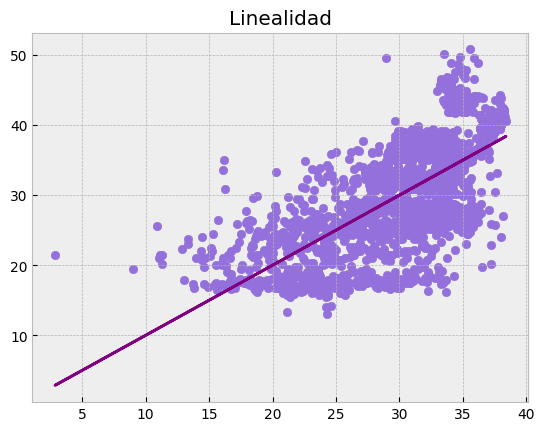

In [82]:
# 1.Linealidad
plt.scatter(y_pred_mult, y_mult, color='mediumpurple')
plt.plot(y_pred_mult, y_pred_mult, color='purple')
plt.title('Linealidad')
plt.show()

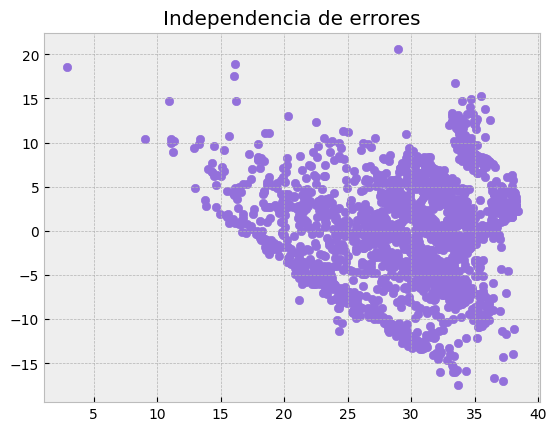

In [83]:
# 2.Independencia de errores
plt.scatter(y_pred_mult, residuos_mult, color='mediumpurple')
plt.title('Independencia de errores')
plt.show()

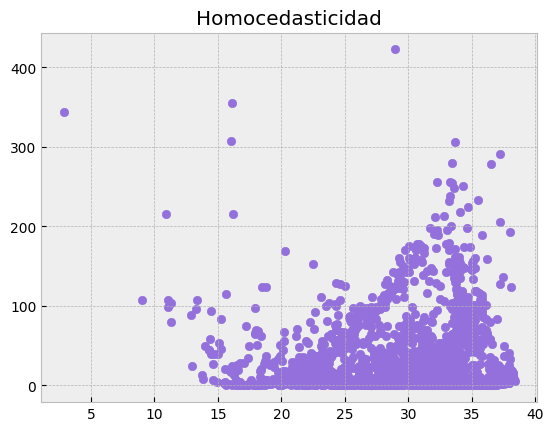

In [84]:
# 3. Homocedasticidad
plt.scatter(y_pred_mult, residuos_mult**2, color='mediumpurple')
plt.title('Homocedasticidad')
plt.show()

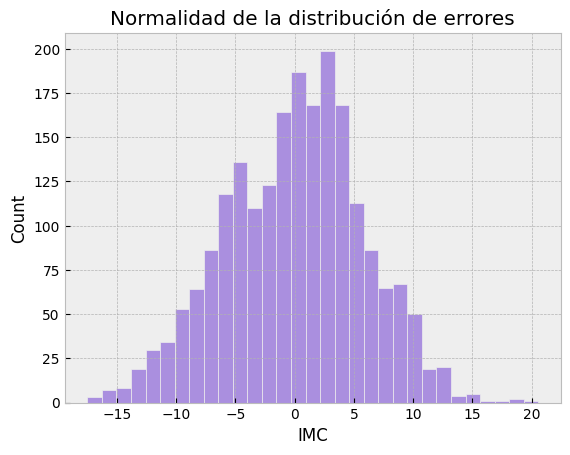

In [85]:
#4 . Normalidad de la distribución de errores
sns.histplot(x=residuos_mult, color='mediumpurple')
plt.title('Normalidad de la distribución de errores')
plt.show()

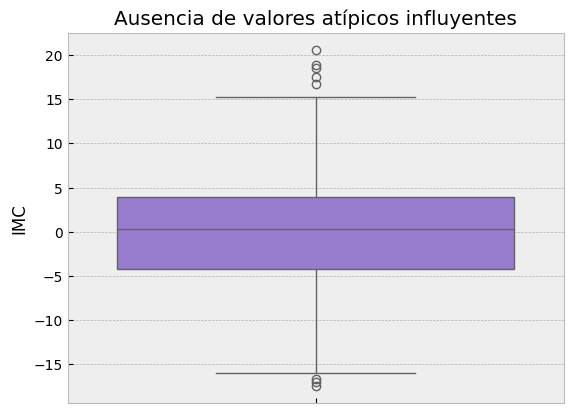

In [86]:
# 5. Ausencia de valores atípicos influyentes
sns.boxplot(data=residuos_mult, color='mediumpurple')
plt.title('Ausencia de valores atípicos influyentes')
plt.show()

Observación de las condiciones:

1. **Linealidad**: Hay una leve tendencia lineal, pero la dispersión es grande entre los puntos y la recta de ajuste, el modelo no es bueno.

2. **Independencia de errores**: Los puntos no se encuentran del todo dispersos.

3. **Homocedasticidad**: Los puntos no se concentran del todo en una línea recta inferior, sino que están dispersos en algunos sectores.

4. **Normalidad de la distribución de errores**: La distribución se podría considerar normal.

5. **Ausencia de valores atípicos influyentes**: Posee valores atípicos, y en algunos casos alejados.

No sirve realizar un modelo de Regresión Lineal debido a que el R cuadrado y el resto de las condiciones no se cumplen, salvo la 4.

**Conclusión:** No es posible relacionar el valor del IMC con el resto de las variables, sin importar el peso y la altura.

## **18 - Explicación de las métricas para los Modelos de Clasificación.**

- **Confusion Matrix (Matriz de Confusión):**
  - Descripción: Una tabla que muestra los Verdaderos Positivos (TP), Falsos Positivos (FP), Verdaderos Negativos (TN) y Falsos Negativos (FN). Proporciona una imagen clara del rendimiento del modelo más allá de la simple exactitud.

- **Accuracy (Exactitud):**
  - Fórmula: $\frac{\text{Número de predicciones correctas}}{\text{Total de predicciones}}$
  - Descripción: Proporciona la fracción de predicciones correctas entre el total de casos. Es útil cuando las clases están balanceadas, pero puede ser engañosa en conjuntos de datos desbalanceados.

- **Precision (Precisión):**
  - Fórmula: $\frac{\text{TP}}{\text{TP} + \text{FP}}$
  - Descripción: Mide la proporción de predicciones positivas que fueron realmente correctas. Es importante cuando el costo de un Falso Positivo es alto.

- **Recall (Sensibilidad):**
  - Fórmula: $\frac{\text{TP}}{\text{TP} + \text{FN}}$
  - Descripción: Mide la proporción de casos positivos reales que fueron identificados correctamente. Es crucial cuando es esencial detectar todos los casos positivos (por ejemplo, en diagnósticos médicos).

- **F1-Score:**
  - Fórmula: $2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}$
  - Descripción: Combina la precisión y la sensibilidad en una sola métrica mediante su media armónica. Es útil cuando se busca un equilibrio entre Precisión y Sensibilidad.

- **ROC-AUC (Área bajo la Curva Característica de Operación del Receptor):**
  - Descripción: Mide la capacidad de un modelo para distinguir entre clases. Un valor de 1 representa una clasificación perfecta, y un valor de 0.5, una clasificación aleatoria.

## **19 - ¿Cómo es la clasificación respecto a la categorización sobre el IMC?**

Aclaración: Se elimina el campo IMC porque tiene relación directa, pero se dejan Height y Weight, que aunque también su relación es directa nos va a servir para poder compararlo con la clasificación de NObeyesdad.

In [87]:
# Eliminamos NObeyesdad y trabajamos con cat_IMC
df_catIMC = df_preprocessed.drop(columns= ['NObeyesdad', 'IMC'])

# Definimos las variables dependiente e independiente
X = df_catIMC.drop('cat_IMC', axis=1)
y = df_catIMC['cat_IMC']

In [88]:
# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

In [89]:
# Definir el scaler y escalar las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

In [90]:
# Convertir los datos escalados de nuevo a un DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

# Update de datos escalados
X_train.update(X_train_scaled)
X_test.update(X_test_scaled)

### Árbol de decisión:

In [91]:
# Crear y entrenar el modelo
arbol = DecisionTreeClassifier(random_state=73)
arbol.fit(X=X_train, y=y_train)

# Predecir para valores de prueba
y_pred_arbol = arbol.predict(X_test)

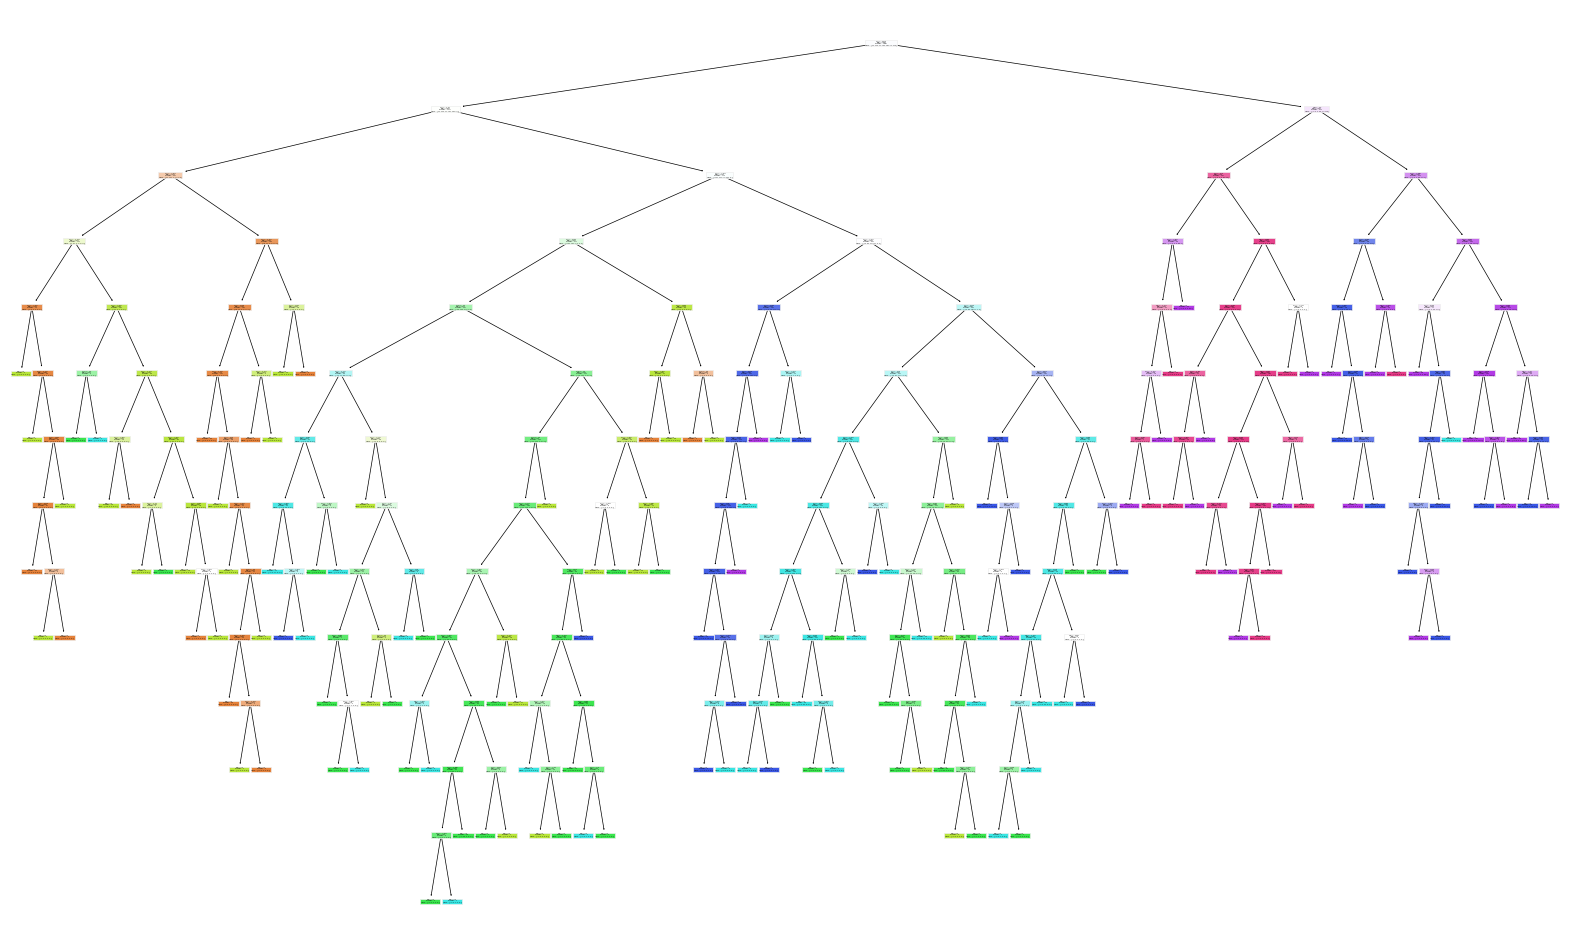

In [92]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,12))
plot_tree(decision_tree=arbol, filled=True)
plt.show()

Text(0.5, 28.383333333333326, 'Valores predicción')

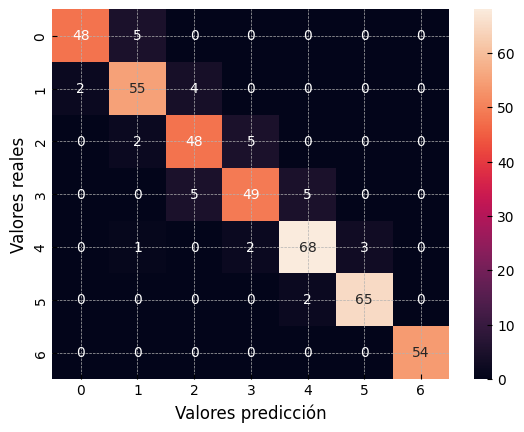

In [93]:
# Crear matríz de confusión
cm_arbol = confusion_matrix(y_true=y_test, y_pred=y_pred_arbol)

# Armar DataFrame para mejor visualización
df_cm_arbol = pd.DataFrame(cm_arbol)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_arbol, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [94]:
# Calcular métricas de clasificación para testeo
accuracy_arbol = accuracy_score(y_test, y_pred_arbol)
precision_arbol = precision_score(y_test, y_pred_arbol, average='macro')
recall_arbol = recall_score(y_test, y_pred_arbol, average='macro')
f1_arbol = f1_score(y_test, y_pred_arbol, average='macro')
#roc_auc_arbol = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train_arbol = arbol.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_arbol = accuracy_score(y_train, y_pred_train_arbol)
precision_train_arbol = precision_score(y_train, y_pred_train_arbol, average='macro')
recall_train_arbol = recall_score(y_train, y_pred_train_arbol, average='macro')
f1_train_arbol = f1_score(y_train, y_pred_train_arbol, average='macro')
#roc_auc_train_arbol = roc_auc_score(y_train, y_pred_train_arbol, multi_class='ovr')

print("Métricas para Decision Tree Classifier:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_arbol}")
print(f"Precision: {precision_train_arbol}")
print(f"Recall: {recall_train_arbol}")
print(f"F1 Score: {f1_train_arbol}")
#print(f"ROC AUC Score: {roc_auc_train_arbol}")

# Mostrar métricas de prueba para comparación
print("\nPara en el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_arbol}")
print(f"Precision: {precision_arbol}")
print(f"Recall: {recall_arbol}")
print(f"F1 Score: {f1_arbol}")
#print(f"ROC AUC Score: {roc_auc}")

Métricas para Decision Tree Classifier:

Para el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Para en el conjunto de prueba/testeo:
Accuracy: 0.9148936170212766
Precision: 0.9160957365402301
Recall: 0.9142290916535132
F1 Score: 0.9148810028780933


### k-NN:

In [95]:
# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_knn = knn.predict(X_test)

Text(0.5, 28.383333333333326, 'Valores predicción')

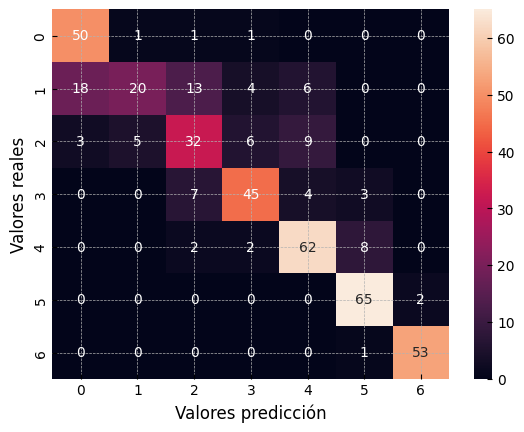

In [96]:
# Crear matríz de confusión
cm_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

# Armar DataFrame para mejor visualización
df_knn = pd.DataFrame(cm_knn)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_knn, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [97]:
# Calcular métricas de clasificación para testeo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
#roc_auc_knn = roc_auc_score(y_test, y_pred_arbol, multi_class='ovr')

y_pred_train_knn = knn.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
precision_train_knn = precision_score(y_train, y_pred_train_knn, average='macro')
recall_train_knn = recall_score(y_train, y_pred_train_knn, average='macro')
f1_train_knn = f1_score(y_train, y_pred_train_knn, average='macro')
#roc_auc_train_knn = roc_auc_score(y_train, y_pred_train_knn, multi_class='ovr')

print("Métricas para K-Neighbors Classifier:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_knn}")
print(f"Precision: {precision_train_knn}")
print(f"Recall: {recall_train_knn}")
print(f"F1 Score: {f1_train_knn}")
#print(f"ROC AUC Score: {roc_auc_train_knn}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
#print(f"ROC AUC Score: {roc_auc_knn}")

Métricas para K-Neighbors Classifier:

Para el conjunto de entrenamiento:
Accuracy: 0.8518957345971564
Precision: 0.8511314521172842
Recall: 0.852184716967804
F1 Score: 0.8432751397705319

Para el conjunto de prueba/testeo:
Accuracy: 0.7730496453900709
Precision: 0.7720515255263978
Recall: 0.772180528307105
F1 Score: 0.7560750744132382


### Regresión logística:

In [98]:
# Crear y entrenar el modelo
log_reg = LogisticRegression(random_state=73)
log_reg.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0.5, 28.383333333333326, 'Valores predicción')

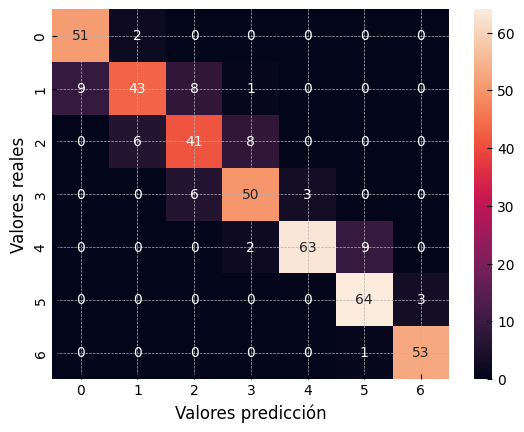

In [99]:
# Crear matríz de confusión
cm_log = confusion_matrix(y_true=y_test, y_pred=y_pred_log)

# Armar DataFrame para mejor visualización
df_log = pd.DataFrame(cm_log)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_log, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [100]:
# Calcular métricas de clasificación para testeo
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='macro')
recall_log = recall_score(y_test, y_pred_log, average='macro')
f1_log = f1_score(y_test, y_pred_log, average='macro')
#roc_auc_log = roc_auc_score(y_test, y_pred_log, multi_class='ovr')

y_pred_train_log = log_reg.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_log = accuracy_score(y_train, y_pred_train_log)
precision_train_log = precision_score(y_train, y_pred_train_log, average='macro')
recall_train_log = recall_score(y_train, y_pred_train_log, average='macro')
f1_train_log = f1_score(y_train, y_pred_train_log, average='macro')
#roc_auc_train_log = roc_auc_score(y_train, y_pred_train_log, multi_class='ovr')

print("Métricas para Logistic Regression:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_log}")
print(f"Precision: {precision_train_log}")
print(f"Recall: {recall_train_log}")
print(f"F1 Score: {f1_train_log}")
#print(f"ROC AUC Score: {roc_auc_train_log}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_log}")
print(f"Precision: {precision_log}")
print(f"Recall: {recall_log}")
print(f"F1 Score: {f1_log}")
#print(f"ROC AUC Score: {roc_auc_log}")

Métricas para Logistic Regression:

Para el conjunto de entrenamiento:
Accuracy: 0.8690758293838863
Precision: 0.8665915384459123
Recall: 0.8706409862490592
F1 Score: 0.8673885179796291

Para el conjunto de prueba/testeo:
Accuracy: 0.8628841607565012
Precision: 0.8605861174775625
Recall: 0.8640215813904742
F1 Score: 0.8601053815682483


### Random Forest:

In [101]:
# Definir el espacio de búsqueda de hiperparámetros
search_space = {
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(1, 30),
    'min_samples_split': Real(0.01, 1.0, 'uniform')
}

In [102]:
# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
clf = RandomForestClassifier(random_state=73)
bayes_search = BayesSearchCV(clf, search_space, n_iter=7, scoring='accuracy', cv=7, random_state=73, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_clf = bayes_search.predict(X_test)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

Best Parameters: OrderedDict([('max_depth', 13), ('min_samples_split', 0.02843004458728534), ('n_estimators', 427)])


Text(0.5, 28.383333333333326, 'Valores predicción')

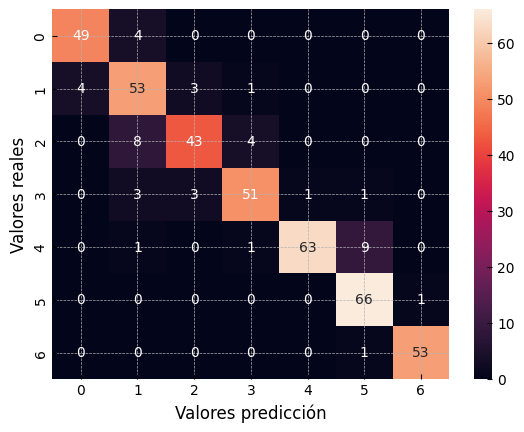

In [103]:
# Crear matríz de confusión
cm_clf = confusion_matrix(y_true=y_test, y_pred=y_pred_clf)

# Armar DataFrame para mejor visualización
df_cm_clf = pd.DataFrame(cm_clf)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_clf, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [104]:
# Calcular métricas de clasificación para testeo
accuracy_clf = accuracy_score(y_test, y_pred_clf)
precision_clf = precision_score(y_test, y_pred_clf, average='macro')
recall_clf = recall_score(y_test, y_pred_clf, average='macro')
f1_clf = f1_score(y_test, y_pred_clf, average='macro')
#roc_auc_clf = roc_auc_score(y_test, y_pred_clf, multi_class='ovr')

y_pred_train_clf = bayes_search.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_clf = accuracy_score(y_train, y_pred_train_clf)
precision_train_clf = precision_score(y_train, y_pred_train_clf, average='macro')
recall_train_clf = recall_score(y_train, y_pred_train_clf, average='macro')
f1_train_clf = f1_score(y_train, y_pred_train_clf, average='macro')
#roc_auc_train_clf = roc_auc_score(y_train, y_pred_train_clf, multi_class='ovr')

print("Métricas para Random Forest Classifier:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_clf}")
print(f"Precision: {precision_train_clf}")
print(f"Recall: {recall_train_clf}")
print(f"F1 Score: {f1_train_clf}")
#print(f"ROC AUC Score: {roc_auc_train_clf}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_clf}")
print(f"Precision: {precision_clf}")
print(f"Recall: {recall_clf}")
print(f"F1 Score: {f1_clf}")
#print(f"ROC AUC Score: {roc_auc}")

Métricas para Random Forest Classifier:

Para el conjunto de entrenamiento:
Accuracy: 0.9034360189573459
Precision: 0.9069473430706998
Recall: 0.902905689726224
F1 Score: 0.9031933997686752

Para el conjunto de prueba/testeo:
Accuracy: 0.8936170212765957
Precision: 0.8982759207219347
Recall: 0.8939304545829841
F1 Score: 0.8939054236330127


### XGBoost:

In [105]:
# Codificamos las variables categóricas para no tener inconvenientes
X_train = pd.get_dummies(X_train, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC', 'CALC'])
X_test = pd.get_dummies(X_test, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC', 'CALC'])


In [106]:
# Crear y entrenar el modelo
xgb = XGBClassifier(objective='multi:softmax', num_class=3, seed=73)
xgb.fit(X_train, y_train)

# Predecir para valores de prueba
y_pred_xgb = xgb.predict(X_test)

Text(0.5, 28.383333333333326, 'Valores predicción')

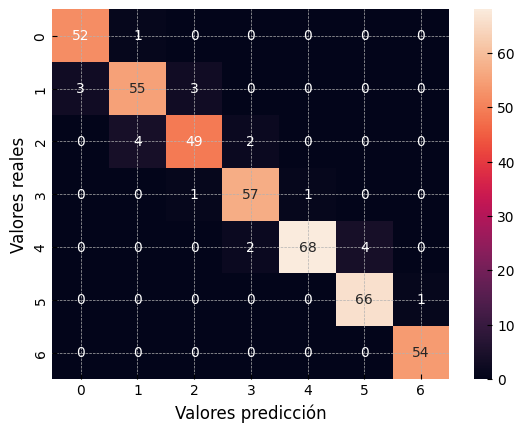

In [107]:
# Crear matríz de confusión
cm_xgb = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb)

# Armar DataFrame para mejor visualización
df_cm_xgb = pd.DataFrame(cm_xgb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_xgb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [108]:
# Calcular métricas de clasificación para testeo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
#roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb, multi_class='ovr')

y_pred_train_xgb = xgb.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
precision_train_xgb = precision_score(y_train, y_pred_train_xgb, average='macro')
recall_train_xgb = recall_score(y_train, y_pred_train_xgb, average='macro')
f1_train_xgb = f1_score(y_train, y_pred_train_xgb, average='macro')
#roc_auc_train_xgb = roc_auc_score(y_train, y_pred_train_xgb, multi_class='ovr')

print("XG Boost:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_xgb}")
print(f"Precision: {precision_train_xgb}")
print(f"Recall: {recall_train_xgb}")
print(f"F1 Score: {f1_train_xgb}")
#print(f"ROC AUC Score: {roc_auc_train_log}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
#print(f"ROC AUC Score: {roc_auc_xgb}")

XG Boost:

Para el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Para el conjunto de prueba/testeo:
Accuracy: 0.9479905437352246
Precision: 0.9473226163669054
Recall: 0.9491108216204184
F1 Score: 0.9478342240312374


### CatBoost:

In [109]:
# X_train y X_test son los calculados en XGBoost
# Crear y entrenar el modelo
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=False)
catboost.fit(X_train, y_train)

# Predecir para valores de prueba
y_pred_cat = catboost.predict(X_test)

Text(0.5, 28.383333333333326, 'Valores predicción')

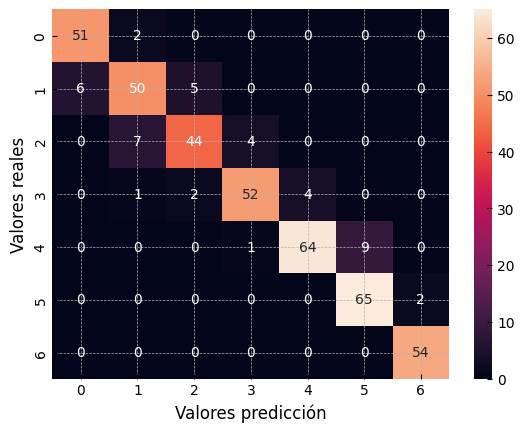

In [110]:
# Crear matríz de confusión
cm_cat = confusion_matrix(y_true=y_test, y_pred=y_pred_cat)

# Armar DataFrame para mejor visualización
df_cm_cat = pd.DataFrame(cm_cat)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_cat, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [111]:
# Calcular métricas de clasificación para testeo
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat, average='macro')
recall_cat = recall_score(y_test, y_pred_cat, average='macro')
f1_cat = f1_score(y_test, y_pred_cat, average='macro')
#roc_auc_cat = roc_auc_score(y_test, y_pred_cat, multi_class='ovr')

y_pred_train_cat = catboost.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_cat = accuracy_score(y_train, y_pred_train_cat)
precision_train_cat = precision_score(y_train, y_pred_train_cat, average='macro')
recall_train_cat = recall_score(y_train, y_pred_train_cat, average='macro')
f1_train_cat = f1_score(y_train, y_pred_train_cat, average='macro')
#roc_auc_train_cat = roc_auc_score(y_train, y_pred_train_cat, multi_class='ovr')

print("CatBoost:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_cat}")
print(f"Precision: {precision_train_cat}")
print(f"Recall: {recall_train_cat}")
print(f"F1 Score: {f1_train_cat}")
#print(f"ROC AUC Score: {roc_auc_train_cat}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_cat}")
print(f"Precision: {precision_cat}")
print(f"Recall: {recall_cat}")
print(f"F1 Score: {f1_cat}")
#print(f"ROC AUC Score: {roc_auc_cat}")

CatBoost:

Para el conjunto de entrenamiento:
Accuracy: 0.9146919431279621
Precision: 0.9148785674382741
Recall: 0.9159439670164903
F1 Score: 0.9151605371412306

Para el conjunto de prueba/testeo:
Accuracy: 0.8983451536643026
Precision: 0.8981337912120751
Recall: 0.8997580475557908
F1 Score: 0.897953122824703


### LightGBM:

In [112]:
# X_train y X_test son los calculados en XGBoost
# Crear y entrenar el modelo
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)
lgbm.fit(X_train, y_train)

# Predecir para valores de prueba
y_pred_lgbm = lgbm.predict(X_test)

Text(0.5, 28.383333333333326, 'Valores predicción')

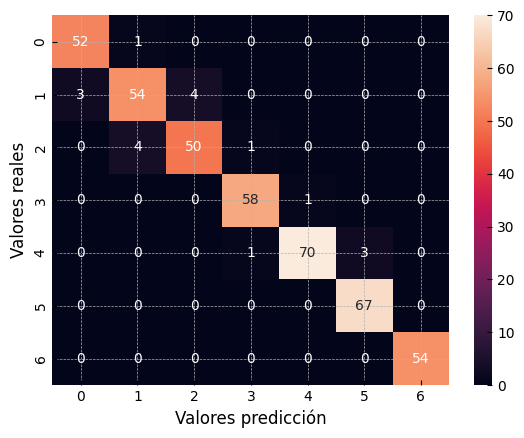

In [113]:
# Crear matríz de confusión
cm_lgbm = confusion_matrix(y_true=y_test, y_pred=y_pred_lgbm)

# Armar DataFrame para mejor visualización
df_cm_lgbm = pd.DataFrame(cm_lgbm)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_lgbm, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [114]:
# Calcular métricas de clasificación para testeo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='macro')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='macro')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='macro')
#roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm, multi_class='ovr')

y_pred_train_lgbm = catboost.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
precision_train_lgbm = precision_score(y_train, y_pred_train_lgbm, average='macro')
recall_train_lgbm = recall_score(y_train, y_pred_train_lgbm, average='macro')
f1_train_lgbm = f1_score(y_train, y_pred_train_lgbm, average='macro')
#roc_auc_train_lgbm = roc_auc_score(y_train, y_pred_train_lgbm, multi_class='ovr')

print("LightGBM:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_lgbm}")
print(f"Precision: {precision_train_lgbm}")
print(f"Recall: {recall_train_lgbm}")
print(f"F1 Score: {f1_train_lgbm}")
#print(f"ROC AUC Score: {roc_auc_train_lgbm}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1 Score: {f1_lgbm}")
#print(f"ROC AUC Score: {roc_auc_lgbm}")

LightGBM:

Para el conjunto de entrenamiento:
Accuracy: 0.9146919431279621
Precision: 0.9148785674382741
Recall: 0.9159439670164903
F1 Score: 0.9151605371412306

Para el conjunto de prueba/testeo:
Accuracy: 0.9574468085106383
Precision: 0.9566228179194111
Recall: 0.9577808113722178
F1 Score: 0.9569719289643189


### Resumen y conclusión:

Como las clases están balanceadas, elegimos comparar los Accuracy de los distintos modelos (fracción de predicciones correctas entre el total de casos):

In [115]:
# Almacenamos los datos en un diccionario
data_catIMC = {'Modelo': ['Árbol de decisición', 'k-NN', 'Regresión logística', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
               'cat_IMC': [accuracy_arbol, accuracy_knn, accuracy_log, accuracy_clf, accuracy_xgb, accuracy_cat, accuracy_lgbm]}

# Creamos un DataFrame
pd.DataFrame(data_catIMC)

Modelo   cat_IMC
0  Árbol de decisición  0.914894
1                 k-NN  0.773050
2  Regresión logística  0.862884
3        Random Forest  0.893617
4              XGBoost  0.947991
5             CatBoost  0.898345
6             LightGBM  0.957447

Se puede notar que en general se obtienen buenos resultados, pero que los mejores son el Árbol de decisión, XGBoost y LightGBM.

## **20 - ¿Cómo es la clasificación respecto a la categorización inicial de NObeyesdad?**

In [116]:
# Eliminamos cat_IMC y trabajamos con NObeyesdad
df_NObeyesdad = df_preprocessed.drop(columns= ['cat_IMC', 'IMC'])

# Definimos las variables dependiente e independiente
X = df_NObeyesdad.drop('NObeyesdad', axis=1)
y = df_NObeyesdad['NObeyesdad']

In [117]:
# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)

In [118]:
# Definir el scaler y escalar las columnas numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

In [119]:
# Convertir los datos escalados de nuevo a un DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

# Update de datos escalados
X_train.update(X_train_scaled)
X_test.update(X_test_scaled)

### Árbol de decisión:

In [120]:
# Crear y entrenar el modelo
arbol = DecisionTreeClassifier(random_state=73)
arbol.fit(X=X_train, y=y_train)

# Predecir para valores de prueba
y_pred_arbol_NOb = arbol.predict(X_test)

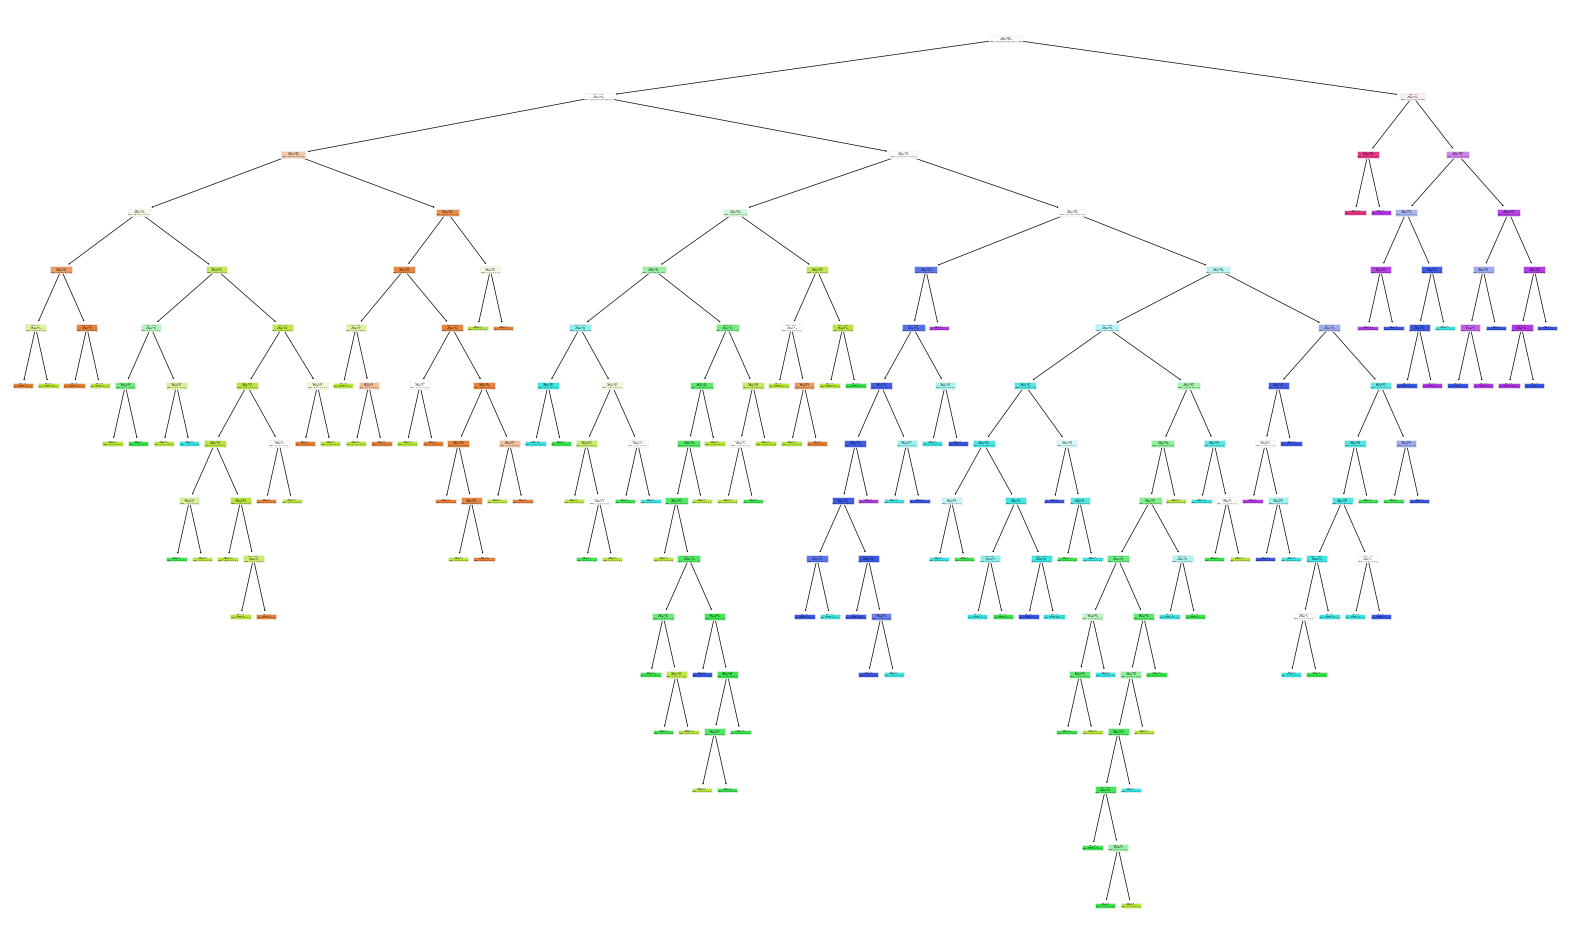

In [121]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,12))
plot_tree(decision_tree=arbol, filled=True)
plt.show()

Text(0.5, 28.383333333333326, 'Valores predicción')

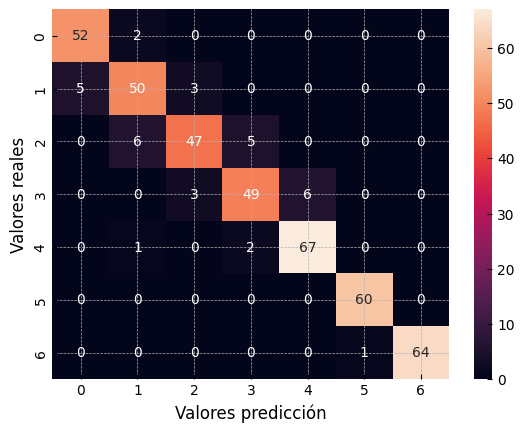

In [122]:
# Crear matríz de confusión
cm_arbol_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_arbol_NOb)

# Armar DataFrame para mejor visualización
df_cm_arbol_NOb = pd.DataFrame(cm_arbol_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_arbol_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [123]:
# Calcular métricas de clasificación para testeo
accuracy_arbol_NOb = accuracy_score(y_test, y_pred_arbol_NOb)
precision_arbol_NOb = precision_score(y_test, y_pred_arbol_NOb, average='macro')
recall_arbol_NOb = recall_score(y_test, y_pred_arbol_NOb, average='macro')
f1_arbol_NOb = f1_score(y_test, y_pred_arbol_NOb, average='macro')
#roc_auc_arbol_NOb = roc_auc_score(y_test, y_pred_arbol_NOb, multi_class='ovr')

y_pred_train_arbol_NOb = arbol.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_arbol_NOb = accuracy_score(y_train, y_pred_train_arbol_NOb)
precision_train_arbol_NOb = precision_score(y_train, y_pred_train_arbol_NOb, average='macro')
recall_train_arbol_NOb = recall_score(y_train, y_pred_train_arbol_NOb, average='macro')
f1_train_arbol_NOb = f1_score(y_train, y_pred_train_arbol_NOb, average='macro')
#roc_auc_train_arbol_NOb = roc_auc_score(y_train, y_pred_train_arbol_NOb, multi_class='ovr')

print("Árbol de decisión:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_arbol_NOb}")
print(f"Precision: {precision_train_arbol_NOb}")
print(f"Recall: {recall_train_arbol_NOb}")
print(f"F1 Score: {f1_train_arbol_NOb}")
#print(f"ROC AUC Score: {roc_auc_train_arbol_NOb}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_arbol_NOb}")
print(f"Precision: {precision_arbol_NOb}")
print(f"Recall: {recall_arbol_NOb}")
print(f"F1 Score: {f1_arbol_NOb}")
#print(f"ROC AUC Score: {roc_auc_arbol_NOb}")

Árbol de decisión:

Para el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Para el conjunto de prueba/testeo:
Accuracy: 0.9196217494089834
Precision: 0.9175636511797644
Recall: 0.9174232262902214
F1 Score: 0.9170257567943114


### k-NN:

In [124]:
# Crear modelo
knn = KNeighborsClassifier(n_neighbors=7)

# Ajustar el modelo
knn.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_knn_NOb = knn.predict(X_test)

Text(0.5, 28.383333333333326, 'Valores predicción')

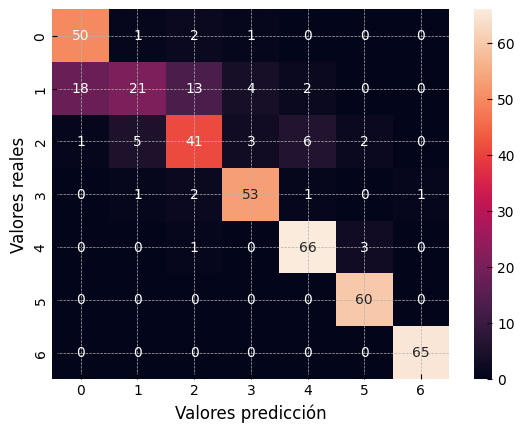

In [125]:
# Crear matríz de confusión
cm_knn_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_knn_NOb)

# Armar DataFrame para mejor visualización
df_knn_NOb = pd.DataFrame(cm_knn_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_knn_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [126]:
# Calcular métricas de clasificación para testeo
accuracy_knn_NOb = accuracy_score(y_test, y_pred_knn_NOb)
precision_knn_NOb = precision_score(y_test, y_pred_knn_NOb, average='macro')
recall_knn_NOb = recall_score(y_test, y_pred_knn_NOb, average='macro')
f1_knn_NOb = f1_score(y_test, y_pred_knn_NOb, average='macro')
#roc_auc_knn_NOb = roc_auc_score(y_test, y_pred_knn_NOb, multi_class='ovr')

y_pred_train_knn_NOb = knn.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_knn_NOb = accuracy_score(y_train, y_pred_train_knn_NOb)
precision_train_knn_NOb = precision_score(y_train, y_pred_train_knn_NOb, average='macro')
recall_train_knn_NOb = recall_score(y_train, y_pred_train_knn_NOb, average='macro')
f1_train_knn_NOb = f1_score(y_train, y_pred_train_knn_NOb, average='macro')
#roc_auc_train_knn_NOb = roc_auc_score(y_train, y_pred_train_knn_NOb, multi_class='ovr')

print("k-NN:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_knn_NOb}")
print(f"Precision: {precision_train_knn_NOb}")
print(f"Recall: {recall_train_knn_NOb}")
print(f"F1 Score: {f1_train_knn_NOb}")
#print(f"ROC AUC Score: {roc_auc_train}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba:")
print(f"Accuracy: {accuracy_knn_NOb}")
print(f"Precision: {precision_knn_NOb}")
print(f"Recall: {recall_knn_NOb}")
print(f"F1 Score: {f1_knn_NOb}")
#print(f"ROC AUC Score: {roc_auc_knn_NOb}")

k-NN:

Para el conjunto de entrenamiento:
Accuracy: 0.8755924170616114
Precision: 0.8767105478840298
Recall: 0.87138748068444
F1 Score: 0.8622576054907717

Para el conjunto de prueba:
Accuracy: 0.8416075650118203
Precision: 0.8323329717626441
Recall: 0.835934527067532
F1 Score: 0.8222432094686019


### Regresión logística:

In [127]:
# Creamos el modelo
log_reg = LogisticRegression(random_state=73)

# Ajustar el modelo
log_reg.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_log_NOb = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0.5, 28.383333333333326, 'Valores predicción')

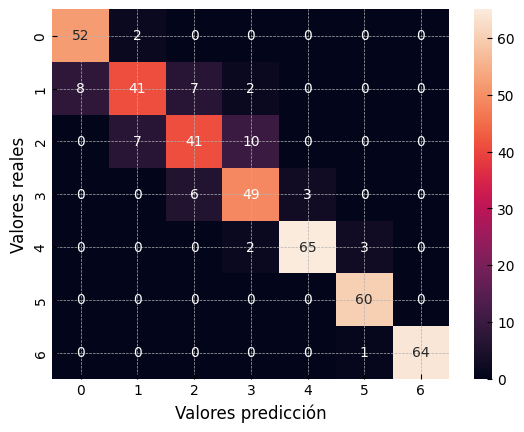

In [128]:
# Crear matríz de confusión
cm_log_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_log_NOb)

# Armar DataFrame para mejor visualización
df_log_NOb = pd.DataFrame(cm_log_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_log_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [129]:
# Calcular métricas de clasificación para testeo
accuracy_log_NOb = accuracy_score(y_test, y_pred_log_NOb)
precision_log_NOb = precision_score(y_test, y_pred_log_NOb, average='macro')
recall_log_NOb = recall_score(y_test, y_pred_log_NOb, average='macro')
f1_log_NOb = f1_score(y_test, y_pred_log_NOb, average='macro')
#roc_auc_log_NOb = roc_auc_score(y_test, y_pred_log,_NOb multi_class='ovr')

y_pred_train_log_NOb = log_reg.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_log_NOb = accuracy_score(y_train, y_pred_train_log_NOb)
precision_train_log_NOb = precision_score(y_train, y_pred_train_log_NOb, average='macro')
recall_train_log_NOb = recall_score(y_train, y_pred_train_log_NOb, average='macro')
f1_train_log_NOb = f1_score(y_train, y_pred_train_log_NOb, average='macro')
#roc_auc_train_log_NOb = roc_auc_score(y_train, y_pred_train_log_NOb, multi_class='ovr')

print("Regresión logística:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_log_NOb}")
print(f"Precision: {precision_train_log_NOb}")
print(f"Recall: {recall_train_log_NOb}")
print(f"F1 Score: {f1_train_log_NOb}")
#print(f"ROC AUC Score: {roc_auc_train_log_NOb}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba:")
print(f"Accuracy: {accuracy_log_NOb}")
print(f"Precision: {precision_log_NOb}")
print(f"Recall: {recall_log_NOb}")
print(f"F1 Score: {f1_log_NOb}")
#print(f"ROC AUC Score: {roc_auc_log_NOb}")

Regresión logística:

Para el conjunto de entrenamiento:
Accuracy: 0.9046208530805687
Precision: 0.9021552393512461
Recall: 0.9028091531575234
F1 Score: 0.9015319561707937

Para el conjunto de prueba:
Accuracy: 0.8794326241134752
Precision: 0.8738694366635543
Recall: 0.8763957808292784
F1 Score: 0.8736598795050036


### Random Forest:

In [130]:
# Definir el espacio de búsqueda de hiperparámetros
search_space = {
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(1, 30),
    'min_samples_split': Real(0.01, 1.0, 'uniform'),
}

In [131]:
# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
clf = RandomForestClassifier(random_state=73)
bayes_search = BayesSearchCV(clf, search_space, n_iter=7, scoring='accuracy', cv=7, random_state=73, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred_clf_NOb = bayes_search.predict(X_test)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

Best Parameters: OrderedDict([('max_depth', 13), ('min_samples_split', 0.02843004458728534), ('n_estimators', 427)])


Text(0.5, 28.383333333333326, 'Valores predicción')

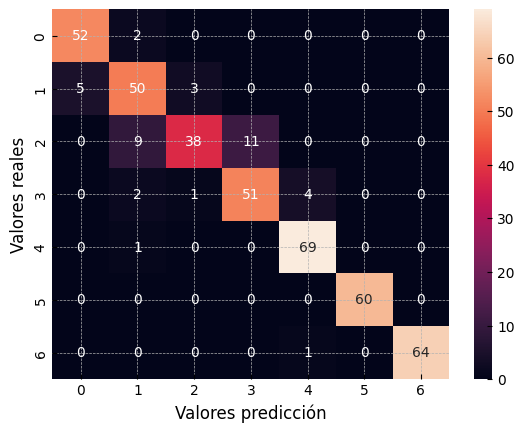

In [132]:
# Crear matríz de confusión
cm_clf_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_clf_NOb)

# Armar DataFrame para mejor visualización
df_cm_clf_NOb = pd.DataFrame(cm_clf_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_clf_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [133]:
# Calcular métricas de clasificación para testeo
accuracy_clf_NOb = accuracy_score(y_test, y_pred_clf_NOb)
precision_clf_NOb = precision_score(y_test, y_pred_clf_NOb, average='macro')
recall_clf_NOb = recall_score(y_test, y_pred_clf_NOb, average='macro')
f1_clf_NOb = f1_score(y_test, y_pred_clf_NOb, average='macro')
#roc_auc_clf_NOb = roc_auc_score(y_test, y_pred_clf_NOb, multi_class='ovr')

y_pred_train_clf_NOb = bayes_search.predict(X_train)

# Calcular métricas de clasificación para training
accuracy_train_clf_NOb = accuracy_score(y_train, y_pred_train_clf_NOb)
precision_train_clf_NOb = precision_score(y_train, y_pred_train_clf_NOb, average='macro')
recall_train_clf_NOb = recall_score(y_train, y_pred_train_clf_NOb, average='macro')
f1_train_clf_NOb = f1_score(y_train, y_pred_train_clf_NOb, average='macro')
#roc_auc_train_clf_NOb = roc_auc_score(y_train, y_pred_train_clf_NOb, multi_class='ovr')

print("Random Forest:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_clf_NOb}")
print(f"Precision: {precision_train_clf_NOb}")
print(f"Recall: {recall_train_clf_NOb}")
print(f"F1 Score: {f1_train_clf_NOb}")
#print(f"ROC AUC Score: {roc_auc_train_clf_NOb}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba:")
print(f"Accuracy: {accuracy_clf_NOb}")
print(f"Precision: {precision_clf_NOb}")
print(f"Recall: {recall_clf_NOb}")
print(f"F1 Score: {f1_clf_NOb}")
#print(f"ROC AUC Score: {roc_auc_clf_NOb}")

Random Forest:

Para el conjunto de entrenamiento:
Accuracy: 0.9419431279620853
Precision: 0.943019318418907
Recall: 0.9403216341526445
F1 Score: 0.9408003226848726

Para el conjunto de prueba:
Accuracy: 0.9078014184397163
Precision: 0.9076150977300019
Recall: 0.9042634796329378
F1 Score: 0.9024557804904736


### XGBoost:

In [134]:
# Codificamos las variables categóricas para no tener inconvenientes
X_train_esp = pd.get_dummies(X_train, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC', 'CALC'])
X_test_esp = pd.get_dummies(X_test, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC', 'CALC'])

In [135]:
# Crear y entrenar el modelo
xgb = XGBClassifier(objective='multi:softmax', num_class=3, seed=73)
xgb.fit(X_train_esp, y_train)

# Predecir para valores de prueba
y_pred_xgb_NOb = xgb.predict(X_test_esp)

Text(0.5, 28.383333333333326, 'Valores predicción')

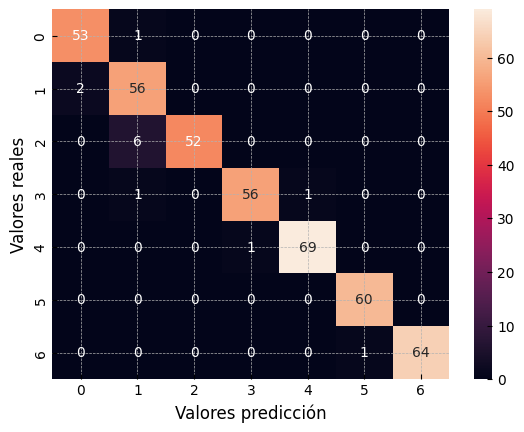

In [136]:
# Crear matríz de confusión
cm_xgb_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb_NOb)

# Armar DataFrame para mejor visualización
df_cm_xgb_NOb = pd.DataFrame(cm_xgb_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_xgb_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [137]:
# Calcular métricas de clasificación para testeo
accuracy_xgb_NOb = accuracy_score(y_test, y_pred_xgb_NOb)
precision_xgb_NOb = precision_score(y_test, y_pred_xgb_NOb, average='macro')
recall_xgb_NOb = recall_score(y_test, y_pred_xgb_NOb, average='macro')
f1_xgb_NOb = f1_score(y_test, y_pred_xgb_NOb, average='macro')
#roc_auc_xgb_NOb = roc_auc_score(y_test, y_pred_xgb_NOb, multi_class='ovr')

y_pred_train_xgb_NOb = xgb.predict(X_train_esp)

# Calcular métricas de clasificación para training
accuracy_train_xgb_NOb = accuracy_score(y_train, y_pred_train_xgb_NOb)
precision_train_xgb_NOb = precision_score(y_train, y_pred_train_xgb_NOb, average='macro')
recall_train_xgb_NOb = recall_score(y_train, y_pred_train_xgb_NOb, average='macro')
f1_train_xgb_NOb = f1_score(y_train, y_pred_train_xgb_NOb, average='macro')
#roc_auc_train_xgb_NOb = roc_auc_score(y_train, y_pred_train_xgb_NOb, multi_class='ovr')

print("XG Boost:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_xgb_NOb}")
print(f"Precision: {precision_train_xgb_NOb}")
print(f"Recall: {recall_train_xgb_NOb}")
print(f"F1 Score: {f1_train_xgb_NOb}")
#print(f"ROC AUC Score: {roc_auc_train_xgb_NOb}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_xgb_NOb}")
print(f"Precision: {precision_xgb_NOb}")
print(f"Recall: {recall_xgb_NOb}")
print(f"F1 Score: {f1_xgb_NOb}")
#print(f"ROC AUC Score: {roc_auc_xgb_NOb}")

XG Boost:

Para el conjunto de entrenamiento:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Para el conjunto de prueba/testeo:
Accuracy: 0.9692671394799054
Precision: 0.9700590495826538
Recall: 0.9684853369582435
F1 Score: 0.9685107607083011


### CatBoost:

In [138]:
# X_train y X_test son los calculados en XGBoost
# Crear y entrenar el modelo
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=False)
catboost.fit(X_train_esp, y_train)

# Predecir para valores de prueba
y_pred_cat_NOb = catboost.predict(X_test_esp)

Text(0.5, 28.383333333333326, 'Valores predicción')

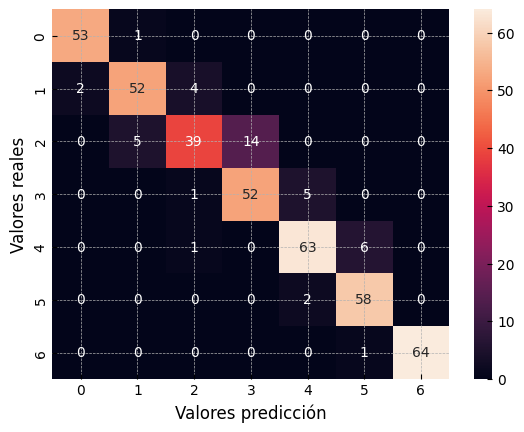

In [139]:
# Crear matríz de confusión
cm_cat_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_cat_NOb)

# Armar DataFrame para mejor visualización
df_cm_cat_NOb = pd.DataFrame(cm_cat_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_cat_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [140]:
# Calcular métricas de clasificación para testeo
accuracy_cat_NOb = accuracy_score(y_test, y_pred_cat_NOb)
precision_cat_NOb = precision_score(y_test, y_pred_cat_NOb, average='macro')
recall_cat_NOb = recall_score(y_test, y_pred_cat_NOb, average='macro')
f1_cat_NOb = f1_score(y_test, y_pred_cat_NOb, average='macro')
#roc_auc_cat_NOb = roc_auc_score(y_test, y_pred_cat_NOb, multi_class='ovr')

y_pred_train_cat_NOb = catboost.predict(X_train_esp)

# Calcular métricas de clasificación para training
accuracy_train_cat_NOb = accuracy_score(y_train, y_pred_train_cat_NOb)
precision_train_cat_NOb = precision_score(y_train, y_pred_train_cat_NOb, average='macro')
recall_train_cat_NOb = recall_score(y_train, y_pred_train_cat_NOb, average='macro')
f1_train_cat_NOb = f1_score(y_train, y_pred_train_cat_NOb, average='macro')
#roc_auc_train_cat_NOb = roc_auc_score(y_train, y_pred_train_cat_NOb, multi_class='ovr')

print("CatBoost:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_cat_NOb}")
print(f"Precision: {precision_train_cat_NOb}")
print(f"Recall: {recall_train_cat_NOb}")
print(f"F1 Score: {f1_train_cat_NOb}")
#print(f"ROC AUC Score: {roc_auc_train_cat_NOb}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_cat_NOb}")
print(f"Precision: {precision_cat_NOb}")
print(f"Recall: {recall_cat_NOb}")
print(f"F1 Score: {f1_cat_NOb}")
#print(f"ROC AUC Score: {roc_auc_cat_NOb}")

CatBoost:

Para el conjunto de entrenamiento:
Accuracy: 0.9360189573459715
Precision: 0.9353699829467118
Recall: 0.9345976825327178
F1 Score: 0.9345624339985984

Para el conjunto de prueba/testeo:
Accuracy: 0.900709219858156
Precision: 0.9010058906610633
Recall: 0.8997543963061204
F1 Score: 0.8978954401701474


### LightGBM:

In [141]:
# X_train y X_test son los calculados en XGBoost
# Crear y entrenar el modelo
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)
lgbm.fit(X_train_esp, y_train)

# Predecir para valores de prueba
y_pred_lgbm_NOb = lgbm.predict(X_test_esp)

Text(0.5, 28.383333333333326, 'Valores predicción')

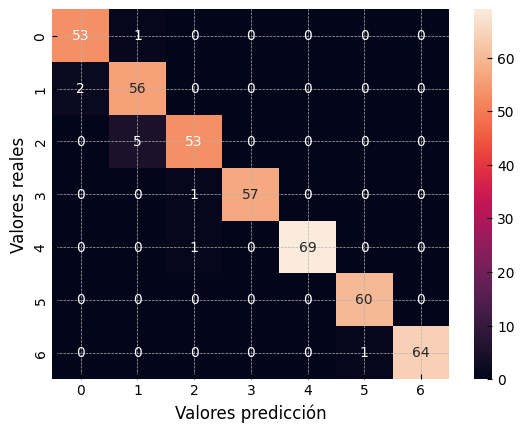

In [142]:
# Crear matríz de confusión
cm_lgbm_NOb = confusion_matrix(y_true=y_test, y_pred=y_pred_lgbm_NOb)

# Armar DataFrame para mejor visualización
df_cm_lgbm_NOb = pd.DataFrame(cm_lgbm_NOb)

# Gráfico de matríz de confusión recomendado con Seaborn
sns.heatmap(data=df_cm_lgbm_NOb, annot=True)
plt.ylabel('Valores reales')
plt.xlabel('Valores predicción')

In [143]:
# Calcular métricas de clasificación para testeo
accuracy_lgbm_NOb = accuracy_score(y_test, y_pred_lgbm_NOb)
precision_lgbm_NOb = precision_score(y_test, y_pred_lgbm_NOb, average='macro')
recall_lgbm_NOb = recall_score(y_test, y_pred_lgbm_NOb, average='macro')
f1_lgbm_NOb = f1_score(y_test, y_pred_lgbm_NOb, average='macro')
#roc_auc_lgbm_NOb = roc_auc_score(y_test, y_pred_lgbm_NOb, multi_class='ovr')

y_pred_train_lgbm_NOb = catboost.predict(X_train_esp)

# Calcular métricas de clasificación para training
accuracy_train_lgbm_NOb = accuracy_score(y_train, y_pred_train_lgbm_NOb)
precision_train_lgbm_NOb = precision_score(y_train, y_pred_train_lgbm_NOb, average='macro')
recall_train_lgbm_NOb = recall_score(y_train, y_pred_train_lgbm_NOb, average='macro')
f1_train_lgbm_NOb = f1_score(y_train, y_pred_train_lgbm_NOb, average='macro')
#roc_auc_train_lgbm_NOb = roc_auc_score(y_train, y_pred_train_lgbm_NOb, multi_class='ovr')

print("LightGBM:")
# Mostrar métricas de training para comparación
print("\nPara el conjunto de entrenamiento:")
print(f"Accuracy: {accuracy_train_lgbm_NOb}")
print(f"Precision: {precision_train_lgbm_NOb}")
print(f"Recall: {recall_train_lgbm_NOb}")
print(f"F1 Score: {f1_train_lgbm_NOb}")
#print(f"ROC AUC Score: {roc_auc_train_lgbm_NOb}")

# Mostrar métricas de prueba para comparación
print("\nPara el conjunto de prueba/testeo:")
print(f"Accuracy: {accuracy_lgbm_NOb}")
print(f"Precision: {precision_lgbm_NOb}")
print(f"Recall: {recall_lgbm_NOb}")
print(f"F1 Score: {f1_lgbm_NOb}")
#print(f"ROC AUC Score: {roc_auc_lgbm_NOb}")

LightGBM:

Para el conjunto de entrenamiento:
Accuracy: 0.9360189573459715
Precision: 0.9353699829467118
Recall: 0.9345976825327178
F1 Score: 0.9345624339985984

Para el conjunto de prueba/testeo:
Accuracy: 0.9739952718676123
Precision: 0.9734435844430556
Recall: 0.9734114453326276
F1 Score: 0.9731367424751438


### Resumen y conclusión:

Como las clases están balanceadas, elegimos comparar los Accuracy de los distintos modelos (fracción de predicciones correctas entre el total de casos):

In [144]:
# Almacenamos los datos en un diccionario
data_NObeyesdad = {'Modelo': ['Árbol de decisición', 'k-NN', 'Regresión logística', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
               'NObeyesdad': [accuracy_arbol_NOb, accuracy_knn_NOb, accuracy_log_NOb, accuracy_clf_NOb, accuracy_xgb_NOb, accuracy_cat_NOb, accuracy_lgbm_NOb]}

# Creamos un DataFrame
pd.DataFrame(data_NObeyesdad)

Modelo  NObeyesdad
0  Árbol de decisición    0.919622
1                 k-NN    0.841608
2  Regresión logística    0.879433
3        Random Forest    0.907801
4              XGBoost    0.969267
5             CatBoost    0.900709
6             LightGBM    0.973995

Al igual que en el caso anterior, se puede notar que en general se obtienen buenos resultados, y también que los mejores son el Árbol de decisión, XGBoost y LightGBM.

## **21 - ¿Conviene otra cantidad de agrupamientos?**

In [145]:
# Eliminamos IMC y cat_IMC
df_sin_Categorias = df_preprocessed.drop(columns= ['cat_IMC', 'IMC'])

# Normalizar las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sin_Categorias.select_dtypes(include=['int64', 'float64']))

# Convertir los datos escalados de nuevo a un DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = df_sin_Categorias.select_dtypes(include=['int64', 'float64']).columns, index = df_sin_Categorias.index)

# Update de datos escalados
df_sin_Categorias.update(df_scaled)

In [146]:
# Definir las features que voy a utilizar para analizar
X = df_sin_Categorias.drop('NObeyesdad', axis=1)

#### K-means:

K-means es un algoritmo de clustering (aprendizaje no supervisado) que divide un conjunto de datos en grupos distintos.

In [147]:
# Instanciar el modelo
k_means = KMeans(n_clusters=7, n_init=10, random_state=73)

# Ajusto el modelo a mis datos
k_means.fit(X)

# Predecir
k_means_labels = k_means.predict(X)

In [148]:
# Visualizar los centroides
centroides = k_means.cluster_centers_

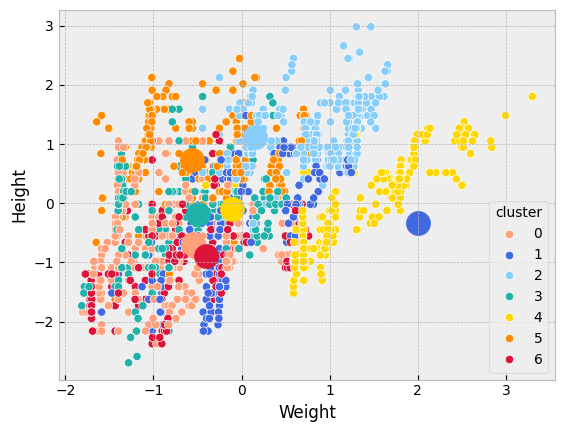

In [149]:
# Gráfico de puntos mostrando los centroides
color = ['lightsalmon', 'royalblue', 'lightskyblue', 'lightseagreen', 'gold', 'darkorange', 'crimson']

# Creo nueva variable que contenga los valores obtenidos en el cluster
df_sin_Categorias['cluster'] = k_means_labels

# Creo Scatterplot
sns.scatterplot(data=df_sin_Categorias, x=df_sin_Categorias.Weight, y=df_sin_Categorias.Height, hue='cluster', palette=color)

# Graficar centroides
for i, centroid in enumerate(centroides):
  plt.scatter(centroid[0], centroid[1], c= color[i], s= 300)

plt.show()

In [150]:
# Comparar los clusters generados contra NObeyesdad
df_sin_Categorias.groupby(['NObeyesdad','cluster']).size()

NObeyesdad  cluster
0.0         0           83
            1            1
            2            0
            3           60
            4            0
            5           80
            6           48
1.0         0           95
            1           14
            2            9
            3           64
            4            1
            5           57
            6           47
2.0         0           49
            1           47
            2           30
            3           45
            4            2
            5           53
            6           64
3.0         0           35
            1           70
            2           54
            3           56
            4            9
            5           38
            6           28
4.0         0           31
            1           86
            2           89
            3           49
            4            3
            5           43
            6           50
5.0         0            7
        

**Método del codo**

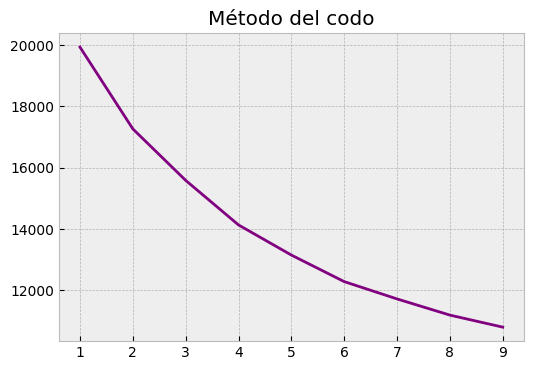

In [151]:
# Método del codo
inertia = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.title('Método del codo')
sns.lineplot(x=range(1,10), y=inertia, color='purple')
plt.show()

Al analizar la gráfica no se logra distinguir un codo para indicar la cantidad de clusters.

**Coeficiente de silueta**

In [152]:
# Calcular coeficiente de silueta
silhouette_kmeans = silhouette_score(X, k_means_labels)

print(f'Coeficiente: {silhouette_kmeans}')

Coeficiente: 0.15232957250279436


Como el coeficiente tiene un valor cercano a 0 indica que los puntos están cerca de la frontera entre dos clusters.

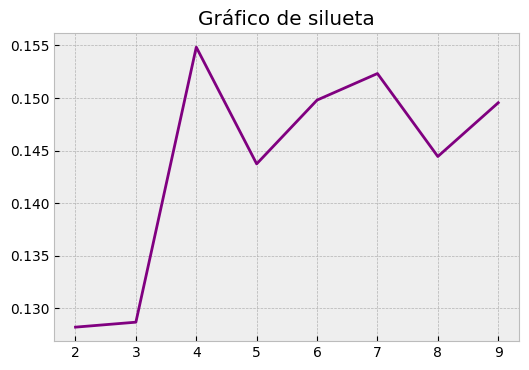

In [153]:
# Grafico de silueta
silhouette = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=73)
  kmeans.fit(X)
  silhouette.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(6,4))
plt.title('Gráfico de silueta')
sns.lineplot(x=range(2,10), y=silhouette, color='purple')
plt.show()

El pico mayor indica la cantidad de clusters que se recomienda utilizar, en este caso podría ser 4 o 7 dado que no hay una gran diferencia.

#### Agglomerative Clustering:

Agglomerative Clustering es un algoritmo de agrupamiento jerárquico que construye una jerarquía de grupos.

In [154]:
# Instancio modelo
aggl = AgglomerativeClustering(n_clusters=7)

# Ajustar a mis datos
aggl.fit(X)
aggl_labels = aggl.labels_

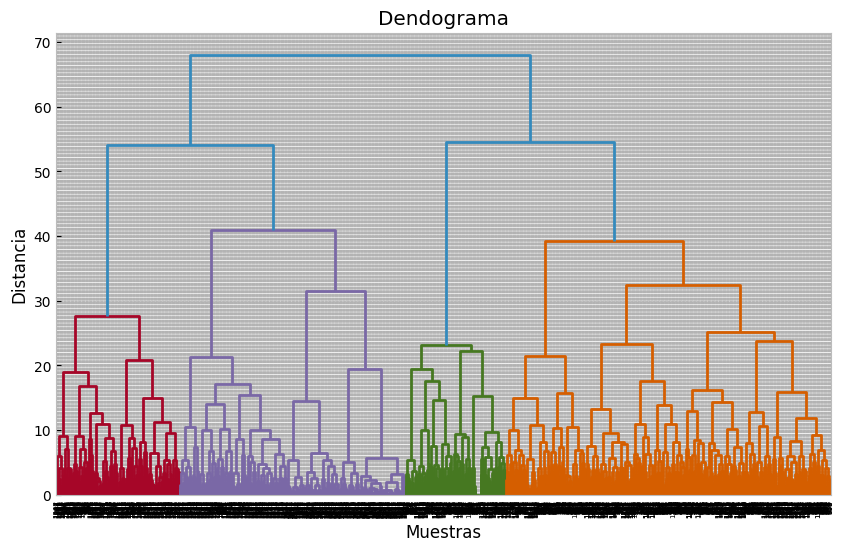

In [155]:
# Genera el dendrograma
Z = linkage(X, 'ward')
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title('Dendograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [156]:
# Comparar los clusters generados contra NObeyesdad
df_sin_Categorias['cluster'] = aggl_labels
df_sin_Categorias.groupby(['NObeyesdad','cluster']).size()

NObeyesdad  cluster
0.0         0            0
            1            1
            2           59
            3           95
            4            0
            5           76
            6           41
1.0         0            0
            1           20
            2           69
            3           91
            4            6
            5           56
            6           45
2.0         0            0
            1           51
            2           60
            3           55
            4           14
            5           30
            6           80
3.0         0            0
            1           89
            2           30
            3           82
            4           34
            5           28
            6           27
4.0         0            0
            1           96
            2           49
            3           72
            4           55
            5           27
            6           52
5.0         0            0
        

**Coeficiente de la silueta**

In [157]:
# Calcular coeficiente de silueta
silhouette_aggl_ = silhouette_score(X, aggl_labels)

print(f'Coeficiente: {silhouette_aggl_}')

Coeficiente: 0.11999705191837991


Como el coeficiente tiene un valor cercano a 0 indica que los puntos están cerca de la frontera entre dos clusters.

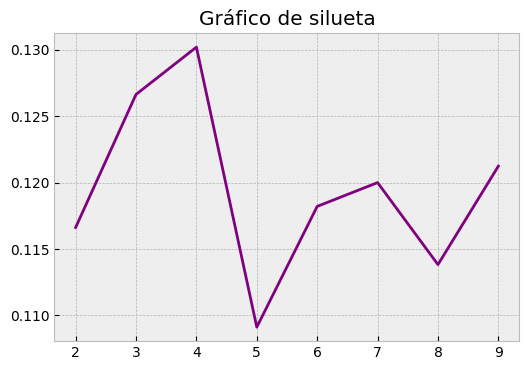

In [158]:
# Grafico de silueta
silhouette = []

for i in range(2,10):
  aggl_ = AgglomerativeClustering(n_clusters=i)
  aggl_.fit(X)
  silhouette.append(silhouette_score(X, aggl_.labels_))

plt.figure(figsize=(6,4))
plt.title('Gráfico de silueta')
sns.lineplot(x=range(2,10), y=silhouette, color='purple')
plt.show()

En este caso la cantidad de clusters sugeridos para utilizar es de 4.

#### DBSCAN:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupamiento basado en la densidad.

In [159]:
# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=7)

# Ajusto a los datos
dbscan.fit(X)

dbscan_labels = dbscan.labels_

In [160]:
# Comparar los clusters generados contra cat_IMC anterior
df_sin_Categorias['cluster'] = dbscan_labels
df_sin_Categorias.groupby(['NObeyesdad','cluster']).size()

NObeyesdad  cluster
0.0         -1          18
             0         254
1.0         -1         127
             0         160
2.0         -1          33
             0         257
3.0         -1          19
             0         271
4.0         -1          14
             0         337
5.0         -1           4
             0         293
6.0         -1           1
             0         323
dtype: int64

**Coeficiente de la silueta.**

In [161]:
# Calcular coeficiente de silueta
silhouette_dbscan_ = silhouette_score(X, dbscan_labels)

print(f'Coeficiente: {silhouette_dbscan_}')

Coeficiente: 0.13625750124576763


Como el coeficiente tiene un valor cercano a 0 indica que los puntos están cerca de la frontera entre dos clusters.

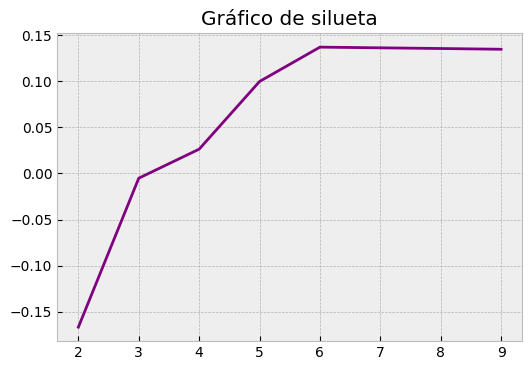

In [162]:
# Grafico de silueta
silhouette = []

for i in range(2,10):
  dbscan_= DBSCAN(eps=2, min_samples=i)
  dbscan_.fit(X)
  silhouette.append(silhouette_score(X, dbscan_.labels_))

plt.figure(figsize=(6,4))
plt.title('Gráfico de silueta')
sns.lineplot(x=range(2,10), y=silhouette, color='purple')
plt.show()

En este caso el pico se puede considerar en 6, aunque luego se genera un descenso casi imperceptible.

#### Conclusión:

Si analizamos los algoritmos planteados se puede notar que se podrían considerar menos agrupamientos que los iniciales, pero esto no seria lo ideal para poder generar un estudio más detallado a sabiendas de los problemas de salud que traen aparejados. (El que más se asimila es el de DBSCAN)


## **22 - Validación de los modelos.**

Si observamos la comparación de las clasificaciones,  en lo particular podemos observar que en ambos casos los mejores accuracy se obtuvieron utilizando los mismos modelos, pero en lo general la clasificación original arroja mejores resultados en la comparativa de todos los modelos (ítems 19 y 20).

In [163]:
# Almacenamos los datos en un diccionario
data_comparacion = {'Modelo': ['Árbol de decisición', 'k-NN', 'Regresión logística', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
                    'cat_IMC': [accuracy_arbol, accuracy_knn, accuracy_log, accuracy_clf, accuracy_xgb, accuracy_cat, accuracy_lgbm],
                    'NObeyesdad': [accuracy_arbol_NOb, accuracy_knn_NOb, accuracy_log_NOb, accuracy_clf_NOb, accuracy_xgb_NOb, accuracy_cat_NOb, accuracy_lgbm_NOb]}

# Creamos un DataFrame
pd.DataFrame(data_comparacion)

Modelo   cat_IMC  NObeyesdad
0  Árbol de decisición  0.914894    0.919622
1                 k-NN  0.773050    0.841608
2  Regresión logística  0.862884    0.879433
3        Random Forest  0.893617    0.907801
4              XGBoost  0.947991    0.969267
5             CatBoost  0.898345    0.900709
6             LightGBM  0.957447    0.973995

A raíz del análisis superior vamos a trabajar con LightGBM y la clasificación original:

#### Con cross_val_score:

In [164]:
# Crear el clasificador
clasificador = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)

# Leave-One-Out Cross-Validation (LOO-CV)      NO LO CORRI PORQUE DEMORA DEMASIADO
#loo = LeaveOneOut()
#scores_loo = cross_val_score(clasificador, X_train_esp, y_train, cv=loo, scoring='accuracy')
#mean_score_loo = np.mean(scores_loo)
#print(f'Leave-One-Out Cross-Validation Accuracy: {mean_score_loo:.4f}')

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=73)
scores_kfold = cross_val_score(clasificador, X_train_esp, y_train, cv=kfold, scoring='accuracy')
mean_score_kfold = np.mean(scores_kfold)
print(f'K-Fold Cross-Validation Accuracy: {mean_score_kfold:.4f}')

# Stratified K-Fold Cross-Validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)
scores_skfold = cross_val_score(clasificador, X_train_esp, y_train, cv=skfold, scoring='accuracy')
mean_score_skfold = np.mean(scores_skfold)
print(f'Stratified K-Fold Cross-Validation Accuracy: {mean_score_skfold:.4f}')

K-Fold Cross-Validation Accuracy: 0.9662
Stratified K-Fold Cross-Validation Accuracy: 0.9633


#### Con un optimizador:

In [165]:
# Definir el clasificador y el espacio de búsqueda de hiperparámetros
modelo = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)
param_space = {
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10)
}

# Leave-One-Out Cross-Validation (LOO-CV)     NO LO CORRI PORQUE DEMORA DEMASIADO
#loo = LeaveOneOut()
#bayes_cv_loo = BayesSearchCV(modelo, param_space, n_iter=10, cv=loo, scoring='accuracy', random_state=73)
#bayes_cv_loo.fit(X_train_esp, y_train)
#mean_score_loo = bayes_cv_loo.best_score_
#print(f'Leave-One-Out Cross-Validation Accuracy: {mean_score_loo:.4f}')

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=73)
bayes_cv_kfold = BayesSearchCV(modelo, param_space, n_iter=10, cv=kfold, scoring='accuracy', random_state=73)
bayes_cv_kfold.fit(X_train_esp, y_train)
mean_score_kfold = bayes_cv_kfold.best_score_
print(f'K-Fold Cross-Validation Accuracy: {mean_score_kfold:.4f}')

# Stratified K-Fold Cross-Validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=73)
bayes_cv_skfold = BayesSearchCV(modelo, param_space, n_iter=10, cv=skfold, scoring='accuracy', random_state=73)
bayes_cv_skfold.fit(X_train_esp, y_train)
mean_score_skfold = bayes_cv_skfold.best_score_
print(f'Stratified K-Fold Cross-Validation Accuracy: {mean_score_skfold:.4f}')

K-Fold Cross-Validation Accuracy: 0.9728
Stratified K-Fold Cross-Validation Accuracy: 0.9680


#### Semillero:

In [166]:
# Definir la cantidad de semillas
N = 7
semillas = [random.randint(0, 10000) for _ in range(N)]
print(f"Semillas aleatorias generadas: {semillas}")

# Lista para almacenar los modelos
modelos = []

for semilla in semillas:
    # Dividir en conjuntos de entrenamiento y prueba
    X_train_semilla, X_test_semilla, y_train_semilla, y_test_semilla = X_train_esp, X_test_esp, y_train, y_test

    # Crear el modelo LightGBM para Clasificación
    modelo = LGBMClassifier(random_state=semilla, verbose=-1)

    # Definir el espacio de búsqueda de hiperparámetros
    espacios = {
        'max_depth': Integer(3, 20),
        'num_leaves': Integer(10, 200),
        'min_child_samples': Integer(5, 100),
        'reg_alpha': Real(0.01, 1.0),
        'reg_lambda': Real(0.01, 1.0)
    }

    # Realizar BayesSearchCV con semillerío
    opt = BayesSearchCV(
        modelo,
        espacios,
        n_iter=20,
        random_state=semilla,
        scoring='accuracy',
        n_jobs=-1,
        cv=7,
        verbose=0
    )

    # Entrenar con la semilla específica
    opt.fit(X_train_semilla, y_train_semilla)

    # Almacenar el modelo entrenado
    modelos.append(opt.best_estimator_)

# Obtener las predicciones por votación para clasificación
predicciones = np.array([modelo.predict(X_test_semilla) for modelo in modelos])
predicciones_votadas = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predicciones.astype(int))

# Calcular la precisión final
precision_final = accuracy_score(y_test_semilla, predicciones_votadas)
print(f"Precisión final (votación de predicciones): {precision_final:.4f}")

Semillas aleatorias generadas: [5810, 137, 5403, 9239, 9866, 8402, 4910]
Precisión final (votación de predicciones): 0.9693


#### Conclusión:

Se puede considerar que los resultados obtenidos son buenos, dado que los valores son altos, estando los accuracy por arriba del 0.96, próximos al valor inicial 0.973995

## **23 - ¿Cuáles son los factores que mayor y menor relevancia tienen sobre NObeyesdad?**

### Importancia de las Características (Feature Importance):

In [167]:
feature_importance = bayes_search.best_estimator_.feature_importances_
pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False)

Weight                            0.372254
FCVC                              0.113428
Gender                            0.077040
Age                               0.074608
Height                            0.061678
NCP                               0.051889
CAEC                              0.040270
family_history_with_overweight    0.038645
TUE                               0.035441
CH2O                              0.029635
FAF                               0.029110
CALC                              0.026897
FAVC                              0.017767
MTRANS_Public_Transportation      0.014824
MTRANS_Automobile                 0.010504
SCC                               0.003622
MTRANS_Walking                    0.001609
SMOKE                             0.000509
MTRANS_Motorbike                  0.000176
MTRANS_Bike                       0.000095
dtype: float64

### Importancia por Permutación (Permutation Importance):

In [168]:
perm_importance = permutation_importance(bayes_search.best_estimator_, X_test, y_test, n_repeats=10, random_state=73)
pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)

Weight                            0.525768
Gender                            0.059811
Height                            0.045626
Age                               0.043499
FCVC                              0.019385
FAVC                              0.018203
NCP                               0.014184
CAEC                              0.012530
family_history_with_overweight    0.012057
CALC                              0.011584
FAF                               0.005201
TUE                               0.004492
CH2O                              0.002364
SCC                               0.002364
MTRANS_Automobile                 0.000473
MTRANS_Motorbike                  0.000000
MTRANS_Walking                    0.000000
MTRANS_Bike                      -0.000236
SMOKE                            -0.000473
MTRANS_Public_Transportation     -0.003783
dtype: float64

### Análisis:

Vemos que para ambos casos las variables con más peso se repiten, aunque en distinto orden: Weight, Gender, Age, FCVC, Height. De igual forma ocurre para las de menor peso, pudiendo reconocer por ejemplo SMOKE y las distintas categorías de MTRANS.

### Características Polinomiales:

In [169]:
# Armar PolynomialFeatures de hasta grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Ajustar y transformar las nuevas variables
X_poly = poly.fit_transform(X)

feature_names = poly.get_feature_names_out(X.columns)

# Crear nuevo dataframe
X_poly_df = pd.DataFrame(X_poly, columns = feature_names)

# Visualizar nuevas features
print(X_poly_df.head())

        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.471293 -0.874380 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.471293 -1.945660 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.154194  1.053924 -0.366089 -0.785019  0.404153 -0.013073  1.163820   
3  0.480005  1.053924  0.015809  1.088342  0.404153 -0.013073  1.163820   
4 -0.312743  0.839668  0.122741 -0.785019 -2.167023 -0.013073 -1.188039   

        TUE  Gender  family_history_with_overweight  ...  \
0  0.561997     0.0                             1.0  ...   
1 -1.080625     0.0                             1.0  ...   
2  0.561997     1.0                             1.0  ...   
3 -1.080625     1.0                             0.0  ...   
4 -1.080625     1.0                             0.0  ...   

   MTRANS_Public_Transportation^2  \
0                             1.0   
1                             1.0   
2                             1.0   
3                             0.0   
4  

### Reducción de la dimensionalidad con PCA:

In [170]:
# Instanciar el modelo
pca = PCA()

X_pca = pca.fit_transform(X_poly_df)

df_pca = pd.DataFrame(X_pca)

df_pca.columns = ['PC'+str(i) for i in range(df_pca.shape[1])]

df_pca['NObeyesdad'] = df_preprocessed['NObeyesdad']

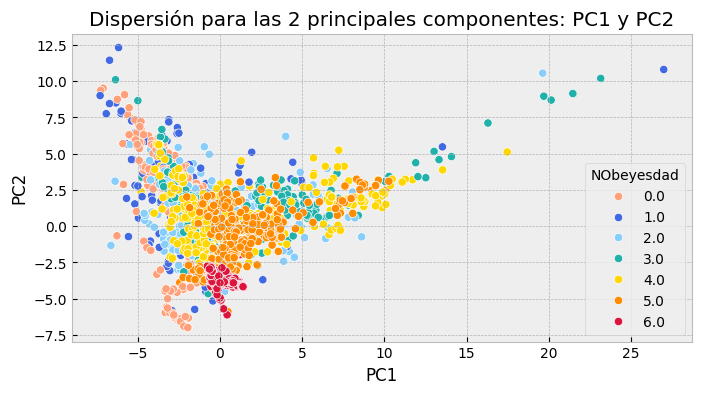

In [171]:
# Gráfico de dispersión para las 2 principales componentes
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='NObeyesdad', palette=color)
plt.title('Dispersión para las 2 principales componentes: PC1 y PC2')
plt.show()

In [172]:
# Graficamos la fracción de varianza que aporta cada componente y la información acumulada
explained_variance = pca.explained_variance_ratio_

# Grafico de barras
fig= px.bar(explained_variance, range(1, len(explained_variance) + 1), explained_variance, title=(f'Fracción de varianza que aporta cada componente y la información acumulada'),
            color_discrete_sequence = ['mediumpurple'])
fig.show()

Se aprecia que con las primeras componentes del gráfico se acumula un alto porcentaje de las varianzas acumuladas, por lo que se puede reducir la dimensionalidad eliminando las restantes. (con los primeros 30 casos se consigue aproximadamente el 80%)

## **24 - Conclusión.**

Respecto a la información original se puede comentar brevemente que las personas encuestadas se dividen parejamente en mujeres y varones, y en su mayoría poseen algún tipo de sobrepeso u obesidad.

Además, si bien no se puede predecir el valor del IMC respecto a los demás campos distintos de Weight y Height, cuando estos datos si se usan los niveles obtenidos por los modelos de clasificación son elevados, aunque levemente inferiores a los de la clasificación original.

A raíz de esto podemos optar por suprimir la inserción de dichos campos (IMC y cat_IMC), y trabajar directamente con NObeyesdad.

El modelo que mejor predice la clasificación es LightGBM, con un accuracy de 0.973995.
